# New sample using only FMOS lines and avoiding 3D-HST data

# COSMOS field

In [1]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import scipy.integrate as integrate
import os
from matplotlib.legend_handler import HandlerPathCollection
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

%matplotlib inline

# FMOS and Laigle data sample

Broadband photometry comes from Laigle et al., 2016 (GALEX, u, B, V, r, i, z, J, H, Ks, IRAC( 1,2,3,4 ))

Laigle: ftp://ftp.iap.fr/pub/from_users/hjmcc/COSMOS2015


Infrared data from HELP-Project HELP 24 μ m and Herschel ( PACS, SPIRE )

HELP: http://hedam.lam.fr/HELP/


Emission lines comes from the FMOS data

Redshifts comes from the FMOS data

FMOS: http://member.ipmu.jp/fmos-cosmos/fmos-cosmos_catalog_2019.fits

##### Laigle et al., 2016 : Survey ///                    Filters      ///       Filters in File

                      GALEX                         (NUV)                  (NUV)
                      MegaCam/CFHT                  (u)                    (u)
                      Suprime-Cam/subaru            (B, V, r, i+, z++)     (B, V, r, ip, zpp)
                      HSC/Subaru                    (Y)                    (yHSC)
                      VIRCAM/VISTA (UltraVISTA-DR2) (Y, J, H, Ks)          (Y, J, H, Ks)
                      WIRCam                        (H, Ks)                (Hw, Ksw)
                      IRAC/Spitzer (SPLASH)         (ch1, ch2, ch3, ch4)   (SPLASH1, SPLASH2, SPLASH3, SPLASH4)
                      
##### HELP projec:         Survey ///                    Filters      ///       Filters in File

                     MegaCam/CFH                    ----> omegacam
                     Suprime-Cam/subaru             ----> suprime
                     HSC/Subaru                     ----> suprime
                     VIRCAM/VISTA (UltraVISTA-DR2)  ----> vista
                     IRAC/Spitzer (SPLASH)          ----> irac_i1, irac_i2, irac_i3, irac_i4
                     PACS                           ----> pacs_green, pacs_red
                     SPIRE                          ----> spire_250, spire_350, spire_500

In [271]:
# Data from Laigle et al., 2016
# Photometry: GALEX NUV, MegaCam/CFHT u, Suprime-Cam/ Subaru (B, V r, i+, z++)
#             HSC/Subaru Y, IRAC/Spitzer (SPLASH) (ch1, ch2, ch3, ch4) 

laigle_16      = Table.read('/data//3DHST_Data/'
                            'COSMOS/COSMOS_Laigle/COSMOS2015_Laigle+_v1.1.fits', format = 'fits')

print('Data in laigle_16 %i'%(len(laigle_16)))

#===================================================================================================================

# Data from Help Project
# Photometry: Spitzer MIPS 24, Herschel PACS (100, 160)
#             Herschel SPIRE (250, 350, 500)

help_large = Table.read('/data//3DHST_Data/COSMOS/'
                        'COSMOS_HELP/HELP_subsample_merged_corrected.fits', format='fits')

print('Data in HELP %i'%len(help_large))

GALEX_merged = Table.read('/data//3DHST_Data/'
                          'COSMOS/COSMOS_HELP/GALEX-merged.fits', format = 'fits')

# print('Data in GALEX_GASC: %i \t Data in GALEX_GMSC:%i'%(len(GALEX_GASC ), len(GALEX_GMSC)))
print('Data in HELP GALEX merged (GASC and GMSC): %i'%len(GALEX_merged))

#===================================================================================================================

# Data has been already changed to have CIGALE units in COSMOSFinalSample_FMOS-emissionLine-Check.ipynb

fmos = Table.read('/data//3DHST_Data/'
                  'FMOS_COSMOS_sample/FMOS_COSMOS_CIGALE.fits', format = 'fits')

print('Data in FMOS %i'%len(fmos))

Data in laigle_16 1182108
Data in HELP 2599374
Data in HELP GALEX merged (GASC and GMSC): 2213
Data in FMOS 5484


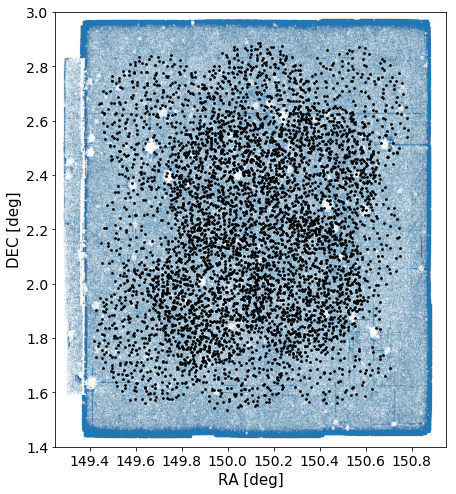

In [4]:
plt.figure(figsize = (7,8))
plt.scatter(laigle_16['ALPHA_J2000'], laigle_16['DELTA_J2000'], s = 0.0005)
plt.scatter(fmos['RA'], fmos['DEC'], s = 3, c = 'k')
plt.xlim(149.25, 150.95)
plt.ylim(1.4, 3.0)
plt.xlabel('RA [deg]', fontsize = 15)
plt.ylabel('DEC [deg]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

# Crossmatch process

In [272]:
# The FMOS database is crossmatched to the Laigle et al., 2016 because I want
# objects with at least one emission line

# There are 5418 pairs found. Only 1931 pbjects have measured spectroscopic redshift

FMOS_Laigle = Table.read('/data/FMOS_Laigle/FMOS_Laigle_2019.fits', format = 'fits')

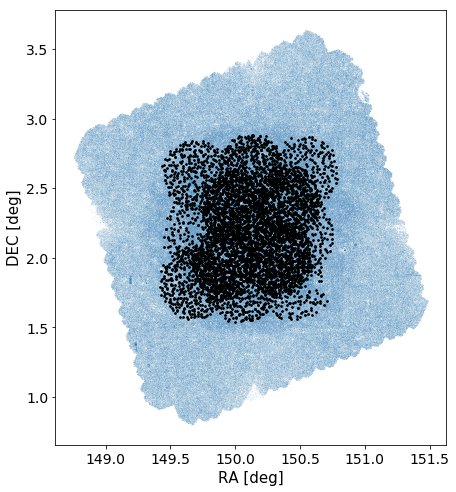

In [101]:
plt.figure(figsize = (7,8))
plt.scatter(help_large['help_ra'], help_large['help_dec'], s = 0.00005)
plt.scatter(FMOS_Laigle['RA'], FMOS_Laigle['DEC'], s = 3, c = 'k')
# plt.xlim(149.25, 150.95)
# plt.ylim(1.4, 3.0)
plt.xlabel('RA [deg]', fontsize = 15)
plt.ylabel('DEC [deg]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

In [273]:
# The FMOS+Laigle et al., 2016 data is crossmatch to the HELP project data

# There are 5462 pairs found. Only 1931 pbjects have measured spectroscopic redshift

FMOS_Laigle_HELP = Table.read('/data/FMOS_Laigle/FMOS_Laigle_HELP_2019.fits', format = 'fits')

FMOS_Laigle_HELP = FMOS_Laigle_HELP.to_pandas()
FMOS_Laigle_HELP = FMOS_Laigle_HELP.fillna(-9999.99)
FMOS_Laigle_HELP = FMOS_Laigle_HELP.replace(-99.0, -9999.99)
FMOS_Laigle_HELP = FMOS_Laigle_HELP.replace(-99.9, -9999.99)
FMOS_Laigle_HELP = Table.from_pandas(FMOS_Laigle_HELP)

In [274]:
# HELP database bands are checked and compared to Laigle et al., 2016
# At this stage, no NUV data from the HELP database was added

Band         = ['NUV','u','B','V','r',\
                'i+','z++','Y','J',\
                'H', 'Ks','IRAC1','IRAC2',\
                'IRAC3','IRAC4','24_mic(HELP)',\
                '100(HELP)', '160(HELP)', '250(HELP)', '300(HELP)', '500(HELP)']

Bands_Laigle = ['FLUXERR_GALEX_NUV', 'u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
               'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
               'H_FLUX_APER3', 'Ks_FLUX_APER3', 'SPLASH_1_FLUX', 'SPLASH_2_FLUX',\
               'SPLASH_3_FLUX', 'SPLASH_4_FLUX', 'help_f_mips_24',\
               'help_f_pacs_green', 'help_f_pacs_red',\
               'help_f_spire_250', 'help_f_spire_350', 'help_f_spire_500']

print('----------------------------------------------------------------------')
print('\t\t\t HELP/Laigle \t\t Valid redshift')
print('----------------------------------------------------------------------')

redshift_valid = FMOS_Laigle_HELP[FMOS_Laigle_HELP['ZBEST'] > 0]

for i in range(len(Band)):
#     help_band   = FMOS_Laigle_HELP[FMOS_Laigle_HELP[Bands_help[i]] != -9999.99]
    laigle_band = FMOS_Laigle_HELP[FMOS_Laigle_HELP[Bands_Laigle[i]] != -9999.99]
    data_valid  = redshift_valid[redshift_valid[Bands_Laigle[i]] != -9999.99]
    print('%15s \t\t %i \t\t %i'%(Band[i], len(laigle_band), len(data_valid)))
    
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
			 HELP/Laigle 		 Valid redshift
----------------------------------------------------------------------
            NUV 		 2431 		 1087
              u 		 5412 		 1918
              B 		 5396 		 1921
              V 		 5414 		 1921
              r 		 5360 		 1920
             i+ 		 5381 		 1921
            z++ 		 5411 		 1921
              Y 		 5418 		 1921
              J 		 5218 		 1873
              H 		 5218 		 1873
             Ks 		 5218 		 1873
          IRAC1 		 5417 		 1921
          IRAC2 		 5416 		 1920
          IRAC3 		 5395 		 1916
          IRAC4 		 5411 		 1918
   24_mic(HELP) 		 4911 		 1769
      100(HELP) 		 4911 		 1769
      160(HELP) 		 4911 		 1769
      250(HELP) 		 2440 		 947
      300(HELP) 		 2440 		 947
      500(HELP) 		 2440 		 947
----------------------------------------------------------------------


In [275]:
# Aperture magnitudes must be corrected (MAG_APER3)
# Following appendix 2 in Laigle et al., 2016

#NOTE: this procedure can be avoided if one used MAG_AUTO. However, this measurements are 
# noisier than the ones computed using MAG_APER3 which must be taken into account for photometric redshift
# calculations. The total fluxes must not be too different, only for the faintest sources. 

flux_aper      =   ['u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
                    'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
                    'H_FLUX_APER3', 'Ks_FLUX_APER3', 'Hw_FLUX_APER3', 'Ksw_FLUX_APER3']

fluxerr_aper   =   ['u_FLUXERR_APER3', 'B_FLUXERR_APER3', 'V_FLUXERR_APER3', 'r_FLUXERR_APER3',\
                    'ip_FLUXERR_APER3', 'zpp_FLUXERR_APER3', 'yHSC_FLUXERR_APER3', 'J_FLUXERR_APER3',\
                    'H_FLUXERR_APER3', 'Ks_FLUXERR_APER3', 'Hw_FLUXERR_APER3', 'Ksw_FLUXERR_APER3']

mag_auto       =   ['u_MAG_AUTO', 'B_MAG_AUTO', 'V_MAG_AUTO', 'r_MAG_AUTO',\
                    'ip_MAG_AUTO', 'zpp_MAG_AUTO', 'yHSC_MAG_AUTO', 'J_MAG_AUTO',\
                    'H_MAG_AUTO', 'Ks_MAG_AUTO', 'Hw_MAG_AUTO', 'Ksw_MAG_AUTO']

mag_auto_sigma =   ['u_MAGERR_AUTO', 'B_MAGERR_AUTO', 'V_MAGERR_AUTO', 'r_MAGERR_AUTO',\
                    'ip_MAGERR_AUTO', 'zpp_MAGERR_AUTO', 'yHSC_MAGERR_AUTO', 'J_MAGERR_AUTO',\
                    'H_MAGERR_AUTO', 'Ks_MAGERR_AUTO', 'Hw_MAGERR_AUTO', 'Ksw_MAGERR_AUTO']

mag_aper       =   ['u_MAG_APER3', 'B_MAG_APER3', 'V_MAG_APER3', 'r_MAG_APER3',\
                    'ip_MAG_APER3', 'zpp_MAG_APER3', 'yHSC_MAG_APER3', 'J_MAG_APER3',\
                    'H_MAG_APER3', 'Ks_MAG_APER3', 'Hw_MAG_APER3', 'Ksw_MAG_APER3']

mag_aper_sigma =   ['u_MAGERR_APER3', 'B_MAGERR_APER3', 'V_MAGERR_APER3', 'r_MAGERR_APER3',\
                    'ip_MAGERR_APER3', 'zpp_MAGERR_APER3', 'yHSC_MAGERR_APER3', 'J_MAGERR_APER3',\
                    'H_MAGERR_APER3', 'Ks_MAGERR_APER3', 'Hw_MAGERR_APER3', 'Ksw_MAGERR_APER3']

# Laigle et al., 2016 table 3, page 8
systematic_offset_perband   = [0.010, 0.146, -0.117, -0.012,\
                               0.020, -0.084, -0.014, 0.017,\
                               0.055, -0.001, -0.031, 0.068]

foreground_extinction       = [4.660, 4.020, 3.117, 2.660,\
                               1.991, 1.461, 1.298, 0.871,\
                               0.563, 0.364, 0.563, 0.364]

systematic_uncertainty_UD   = [3.3, 1.8, 1.9, 1.7,\
                               1.7, 2.9, 2.7, 3.3,\
                               3.1, 3.1, 3.2, 3.4]

systematic_uncertainty_Deep = [3.3, 1.8, 1.9, 1.7,\
                               1.7, 2.9, 2.7, 2.9,\
                               2.9, 2.6, 3.2, 3.4]

# Number of measurements. Number of bands involved
N = len(FMOS_Laigle_HELP)
D = len(flux_aper)

#===================================================================================================================
# Correcting the magnitudes
#===================================================================================================================

W_i    = []
Mag_Wi = []
for j in range(len(FMOS_Laigle_HELP)):
    
    weights         = 0.0
    mag_weights     = 0.0
    
    for i in range(len(flux_aper)):
        
        sigma_auto  = FMOS_Laigle_HELP[mag_auto_sigma[i]][j]
        sigma_aper  = FMOS_Laigle_HELP[mag_aper_sigma[i]][j]
    
        mag_auto_1  = FMOS_Laigle_HELP[mag_auto[i]][j]
        mag_aper_1  = FMOS_Laigle_HELP[mag_aper[i]][j]
    
        mag_diff    = mag_auto_1 - mag_aper_1
    
        w_i         = 1.0 / (sigma_auto**2 + sigma_aper**2)
        weights     = weights + w_i
    
        mag_w_i     = mag_diff * w_i
        mag_weights = mag_weights + mag_w_i
        
    W_i.append(weights)    
    Mag_Wi.append(mag_weights)
    
# The offsets from Laigle et al., 2016 are used. Above's procedure is not needed.    
photometric_offset_mag_mine = np.multiply( np.divide(1.0, W_i), Mag_Wi )
photometric_offset_mag      = FMOS_Laigle_HELP['OFFSET']

magnitudes_corrected   = np.zeros((N,D))

for j in range(len(FMOS_Laigle_HELP)):
    for i in range(len(systematic_offset_perband)):
    
        mag_aper_perband  = FMOS_Laigle_HELP[mag_aper[i]][j]
    
        mag_total = mag_aper_perband + photometric_offset_mag[j] - systematic_offset_perband[i] -\
                    FMOS_Laigle_HELP['EBV'][j]*foreground_extinction[i]
    
        magnitudes_corrected[j][i] = mag_total
                

corrected_mag_err        = np.zeros((N,D))
for j in range(len(FMOS_Laigle_HELP)):
    for i in range(len(systematic_offset_perband)):
        
        err_aper3 = FMOS_Laigle_HELP[mag_aper_sigma[i]][j]

        err_total = err_aper3

        corrected_mag_err[j][i] = err_total       


# Fluxes are retrieved in Jy     
corrected_fluxes       = ( 10**( (8.9 - magnitudes_corrected)/2.5 ) )
corrected_fluxes_err   =  corrected_mag_err * corrected_fluxes * ( np.log(10)/2.5 )

# Fluxes are added in µJy
corrected_fluxes       = corrected_fluxes*1e6
corrected_fluxes_err   = corrected_fluxes_err*1e6

# Sending the total mag per band into an array

mag_total       =   ['u_MAG_TOT', 'B_MAG_TOT', 'V_MAG_TOT', 'r_MAG_TOT',\
                    'ip_MAG_TOT', 'zpp_MAG_TOT', 'yHSC_MAG_TOT', 'J_MAG_TOT',\
                    'H_MAG_TOT', 'Ks_MAG_TOT', 'Hw_MAG_TOT', 'Ksw_MAG_TOT']

index = [FMOS_Laigle_HELP['HELP_id'][i] for i in range(len(FMOS_Laigle_HELP))]

df = pd.DataFrame(magnitudes_corrected, index=index, columns =mag_total, dtype = 'float64')


# Saving the total flux and total flux err per band
flux_total      =   ['u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
                    'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
                    'H_FLUX_TOT', 'Ks_FLUX_TOT', 'Hw_FLUX_TOT', 'Ksw_FLUX_TOT']

flux_total_err  =   ['u_FLUX_TOT_err', 'B_FLUX_TOT_err', 'V_FLUX_TOT_err', 'r_FLUX_TOT_err',\
                    'ip_FLUX_TOT_err', 'zpp_FLUX_TOT_err', 'yHSC_FLUX_TOT_err', 'J_FLUX_TOT_err',\
                    'H_FLUX_TOT_err', 'Ks_FLUX_TOT_err', 'Hw_FLUX_TOT_err', 'Ksw_FLUX_TOT_err']

index_1 = [FMOS_Laigle_HELP['HELP_id'][i] for i in range(len(FMOS_Laigle_HELP))]

df_1   = pd.DataFrame(corrected_fluxes, index=index_1, columns =flux_total, dtype = 'float64')
df_2   = pd.DataFrame(corrected_fluxes_err, index=index_1, columns =flux_total_err, dtype = 'float64')

fluxes_corrected = pd.concat([df_1, df_2], axis=1, sort=False)

# New total fluxes are added to the original merged and crossmatched table
# A new table is saved as 'final_sample.fits'

fluxes_laigle_corrected = Table.from_pandas(fluxes_corrected)
fluxes_laigle_corrected = Table.to_pandas(fluxes_laigle_corrected)

original_laigle_sample  = FMOS_Laigle_HELP.to_pandas()

final_sample = pd.concat([original_laigle_sample, fluxes_laigle_corrected], axis=1, sort=False)

final_sample = Table.from_pandas(final_sample)

os.system('rm -rf /data/FMOS_Laigle/FMOS_Laigle-corrected_HELP_2019.fits')
final_sample.write('/data/FMOS_Laigle/FMOS_Laigle-corrected_HELP_2019.fits', format = 'fits')

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: overflow encountered in power


In [276]:
# FMOS_Laigle-corrected_HELP_2019.fits is crossmatch to the GALEX sample to add FUV data

# Only 21 pairs found to contain GALEX data
# In the Laigle et al., 2016 I have more this why I chose it probably

# Creating the final sample for CIGALE

The final file which must be provided to CIGALE is created here. 

The FLUX units must be mJy, the FLUX-Density units Joules/s/m^2
The redshifts cannot too small. Some problems can arise if the value corresponds to -9999.99

Final samples are crossmatched to Buat et al., 2018 data in order to compare if the redshift, flux, flux-density range are in the same range as expected. this is really important before writing out the final file to be used in the CIGALE runs. 

In [277]:
# The FMOS_Laigle-corrected_HELP_GALEX_2019.fits is crossmatched to Morphology and CHANDRA data
# Only 758 pairs found in CHANDRA
# Only 322 pairs found in Morphology-catalog

sample = Table.read('/data/FMOS_Laigle/FMOS_Laigle-corrected_HELP_GALEX_CHANDRA_Morphology_2019.fits', format = 'fits')

In [278]:
sample = sample.to_pandas()
sample = sample.replace([np.inf, -np.inf], np.nan)
sample = sample.fillna(-9999.99)
sample = Table.from_pandas(sample)

#===================================================================================================================
# Changing units for CIGALE and correcting data
#===================================================================================================================

# Emission lines are already in the good format because I converted the file for FMOS

uJy_to_mJy = 1e-3    # microJy to milliJY

flux_tot       = ['FLUX_GALEX_NUV',\
                  'u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
                  'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
                  'H_FLUX_TOT', 'Ks_FLUX_TOT',\
                  'SPLASH_1_FLUX', 'SPLASH_2_FLUX', 'SPLASH_3_FLUX', 'SPLASH_4_FLUX',\
                  'help_f_mips_24',\
                  'help_f_pacs_green', 'help_f_pacs_red',\
                  'help_f_spire_250', 'help_f_spire_350',\
                  'help_f_spire_500']

fluxerr_tot    = ['FLUXERR_GALEX_NUV',\
                  'u_FLUX_TOT_err', 'B_FLUX_TOT_err', 'V_FLUX_TOT_err', 'r_FLUX_TOT_err',\
                  'ip_FLUX_TOT_err', 'zpp_FLUX_TOT_err', 'yHSC_FLUX_TOT_err', 'J_FLUX_TOT_err',\
                  'H_FLUX_TOT_err', 'Ks_FLUX_TOT_err',\
                  'SPLASH_1_FLUX_ERR', 'SPLASH_2_FLUX_ERR', 'SPLASH_3_FLUX_ERR', 'SPLASH_4_FLUX_ERR',\
                  'help_ferr_mips_24',\
                  'help_ferr_pacs_green', 'help_ferr_pacs_red',\
                  'help_ferr_spire_250', 'help_ferr_spire_350',\
                  'help_ferr_spire_500']

# Convert from μJy to mJy
for i in range (len(flux_tot)):
    
    sample[flux_tot[i]]    = sample[flux_tot[i]]*uJy_to_mJy
    sample[fluxerr_tot[i]] = sample[fluxerr_tot[i]]*uJy_to_mJy  

# Changing possible 'NAN' values and -99.0 to -9999.999
# Cutting in redshift to be consistent with the H-alpha line in the 3D-HST grism range
# Two files are saved: With and without PACS and SPIRE data

for i in range(len(flux_total)):
    
    sample[flux_total[i]][np.isinf(sample[flux_total[i]])]         = -9999.99
    sample[flux_total_err[i]][np.isinf(sample[flux_total_err[i]])] = -9999.99

sample = sample.to_pandas()
sample = sample.replace([np.inf, -np.inf], np.nan)
sample = sample.replace(-9999.99*uJy_to_mJy, -9999.99)
sample = sample.fillna(-9999.99)
sample = Table.from_pandas(sample)

# Filtering out by Lx to clean AGNs and arrasing NUV dat below the break

In [279]:
GALEX_NUV = Table.read('/data//3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                       'NUV-UVIMOS-filters/GALEX_GALEX.NUV.dat', format = 'ascii')
UVIMOS    = Table.read('/data//3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                       'NUV-UVIMOS-filters/Paranal_VIMOS.U.dat', format = 'ascii')
MegaCam_U = Table.read('/data//3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                       'NUV-UVIMOS-filters/CFHT_MegaCam.u.dat', format = 'ascii')

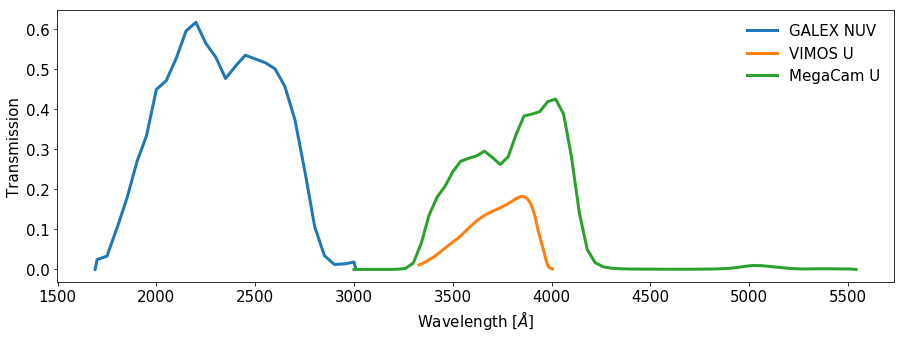

In [280]:
plt.figure(figsize=(15,5))
plt.plot(GALEX_NUV['col1'], GALEX_NUV['col2'], lw = 3, label = 'GALEX NUV')
plt.plot(UVIMOS['col1'], UVIMOS['col2'],  lw = 3, label = 'VIMOS U')
plt.plot(MegaCam_U['col1'], MegaCam_U['col2'],  lw = 3, label = 'MegaCam U')
plt.xlabel(r'Wavelength [$\AA$]', fontsize = 15)
plt.ylabel('Transmission', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 4 , loc = 'upper right');

In [281]:
def lambda_redshift(L_obs, L_Lyman):
    return(L_obs/L_Lyman - 1.0)

print('For GALEX NUV exlude all galxies below %.3f if Lyman break is 912A'%lambda_redshift(1692.52, 912.0))
print('For GALEX NUV exlude all galxies below %.3f if Lyman break is 912A and FWHM is used'%lambda_redshift(1802.175, 912.0))
print('For GALEX NUV exlude all galxies below %.3f if Lyman break is 1000A'%lambda_redshift(1692.52, 1000.0))
print('For GALEX NUV exlude all galxies below %.3f if Lyman break is 1000A and FWHM is used\n'%lambda_redshift(1802.175, 1000.0))

For GALEX NUV exlude all galxies below 0.856 if Lyman break is 912A
For GALEX NUV exlude all galxies below 0.976 if Lyman break is 912A and FWHM is used
For GALEX NUV exlude all galxies below 0.693 if Lyman break is 1000A
For GALEX NUV exlude all galxies below 0.802 if Lyman break is 1000A and FWHM is used



In [282]:
# Excluding values below z = 0.856 for small sample

for i in range(len(sample)):
    if (sample['ZBEST'][i] < 0.856):
        sample['FLUX_GALEX_NUV'][i]     = -9999.99
        sample['FLUXERR_GALEX_NUV'][i]  = -9999.99

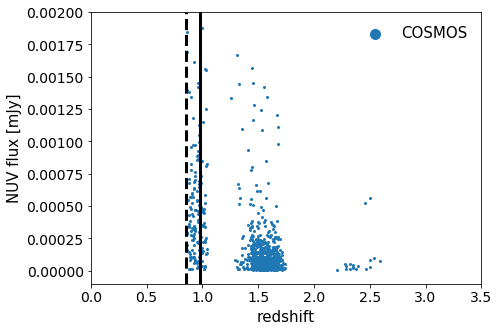

In [283]:
plt.figure(figsize=(7,5))
plt.scatter(sample['ZBEST'], sample['FLUX_GALEX_NUV'], s = 4, label = 'COSMOS')
plt.axvline(x = 0.856, ls = '--', lw = 3, c = 'k')
plt.axvline(x = 0.976, ls = '-', lw = 3, c = 'k')
plt.ylim(-0.0001, 0.002)
plt.xlim(0, 3.5)
plt.xlabel('redshift', fontsize = 15)
plt.ylabel('NUV flux [mJy]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 5 , loc = 'upper right');

COSMOS below HR < 0: 432 out of 758
From 5484 only 589 are discarded
AGNs in COSMOS from Lx: 589 out of 758


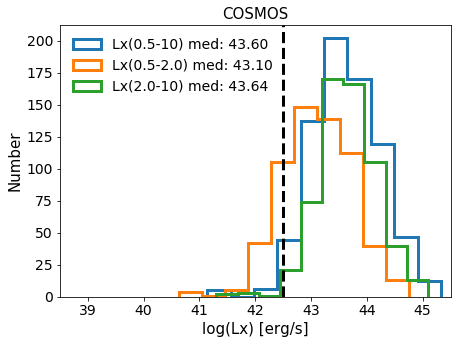

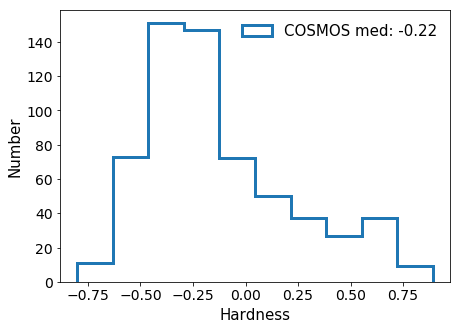

In [284]:
Lx0510_COSMOS = sample[sample['Lx_0510'] > 0]['Lx_0510']
Lx052_COSMOS  = sample[sample['Lx_052'] > 0]['Lx_052']
Lx210_COSMOS  = sample[sample['Lx_210'] > 0]['Lx_210']

plt.figure(figsize=(7,5))
plt.hist(Lx0510_COSMOS, histtype = 'step', lw = 3, label = 'Lx(0.5-10) med: %.2f'%np.median(Lx0510_COSMOS))
plt.hist(Lx052_COSMOS, histtype = 'step', lw = 3, label = 'Lx(0.5-2.0) med: %.2f'%np.median(Lx052_COSMOS))
plt.hist(Lx210_COSMOS, histtype = 'step', lw = 3, label = 'Lx(2.0-10) med: %.2f'%np.median(Lx210_COSMOS))
plt.axvline(x=42.5, lw = 3, ls = '--', c = 'k')
plt.xlabel('log(Lx) [erg/s]', fontsize = 15)
plt.xlim(38.5, 45.5)
plt.ylabel('Number', fontsize = 15)
plt.title('COSMOS', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(frameon = False, prop = {'size': 14}, markerscale = 1.5 , loc = 'upper left');

HR_COSMOS = sample[sample['HR'] > -20]['HR']
COSMOS_agns = sample[(sample['HR'] < 0) & (sample['HR'] > -20)]['HR']

print('COSMOS below HR < 0: %i out of 758'%len(COSMOS_agns))

plt.figure(figsize=(7,5))
plt.hist(HR_COSMOS, histtype = 'step', lw = 3, label = 'COSMOS med: %.2f'%np.median(HR_COSMOS))
plt.xlabel('Hardness', fontsize = 15)
plt.ylabel('Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper right');

# Xray filtering

COSMOS_xray_Lx210_matched    = sample[(sample['Lx_210'] < 42.5)]
COSMOS_xray_AGN_matched      = sample[(sample['Lx_210'] > 42.5)]

print('From %i only %i are discarded'%(len(sample), len(sample)-len(COSMOS_xray_Lx210_matched)))
print('AGNs in COSMOS from Lx: %i out of 758'%(len(COSMOS_xray_AGN_matched)))

COSMOS_xray_AGN_all = sample[sample['Lx_210'] < 42.5]

sample = sample[(sample['Lx_210'] < 42.5)]

In [285]:
# Filtering out by redshift because some objects have no information

sample = sample[sample['ZBEST'] > 0]

sample = sample.to_pandas()
sample = sample.replace([np.inf, -np.inf], np.nan)
sample = sample.replace(-9999.99*uJy_to_mJy, -9999.99)
sample = sample.fillna(-9999.99)
sample = Table.from_pandas(sample)

COSMOS_CIGALE =  Table([sample['FMOS_ID'], sample['help_ra'], sample['help_dec'], sample['ZBEST'], sample['FLUX_GALEX_NUV'],\
                        sample['FLUXERR_GALEX_NUV'], sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                        sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'], sample['V_FLUX_TOT'],\
                        sample['V_FLUX_TOT_err'], sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                        sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'], sample['zpp_FLUX_TOT'],\
                        sample['zpp_FLUX_TOT_err'], sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                        sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'], sample['H_FLUX_TOT'],\
                        sample['H_FLUX_TOT_err'], sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                        sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'], sample['SPLASH_2_FLUX'],\
                        sample['SPLASH_2_FLUX_ERR'], sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                        sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR'],\
                        sample['help_f_mips_24'], sample['help_ferr_mips_24'],\
                        sample['help_f_pacs_green'], sample['help_ferr_pacs_green'],\
                        sample['help_f_pacs_red'], sample['help_ferr_pacs_red'],\
                        sample['help_f_spire_250'], sample['help_ferr_spire_250'],\
                        sample['help_f_spire_350'], sample['help_ferr_spire_350'],\
                        sample['help_f_spire_500'], sample['help_ferr_spire_500'], sample['FLUX_HALPHA'],\
                        sample['FLUX_ERR_HALPHA'], sample['FLUX_HBETA'], sample['FLUX_ERR_HBETA'],\
                        sample['FLUX_NII6584'], sample['FLUX_ERR_NII6584'],\
                        sample['FLUX_OIII5007'], sample['FLUX_ERR_OIII5007']],\
               names = ('id', 'ra', 'dec', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.H-alpha', 'line.H-alpha_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.NII-658.4', 'line.NII-658.4_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /data/FMOS_Laigle/COSMOS_CIGALE_2019_coordinates.fits')
COSMOS_CIGALE.write('/data/FMOS_Laigle/COSMOS_CIGALE_2019_coordinates.fits', format='fits')

In [288]:
# # Filtering out by redshift because some objects have no information

# sample = sample[sample['ZBEST'] > 0]

# sample = sample.to_pandas()
# sample = sample.replace([np.inf, -np.inf], np.nan)
# sample = sample.replace(-9999.99*uJy_to_mJy, -9999.99)
# sample = sample.fillna(-9999.99)
# sample = Table.from_pandas(sample)

# COSMOS_CIGALE =  Table([sample['FMOS_ID'], sample['help_ra'], sample['help_dec'], sample['ZBEST'], sample['FLUX_GALEX_NUV'],\
#                         sample['FLUXERR_GALEX_NUV'], sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
#                         sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'], sample['V_FLUX_TOT'],\
#                         sample['V_FLUX_TOT_err'], sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
#                         sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'], sample['zpp_FLUX_TOT'],\
#                         sample['zpp_FLUX_TOT_err'], sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
#                         sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'], sample['H_FLUX_TOT'],\
#                         sample['H_FLUX_TOT_err'], sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
#                         sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'], sample['SPLASH_2_FLUX'],\
#                         sample['SPLASH_2_FLUX_ERR'], sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
#                         sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR'],\
#                         sample['F24'], sample['DF24'],\
#                         sample['F100'], sample['DF100'],\
#                         sample['F160'], sample['DF160'],\
#                         sample['F250'], sample['DF250'],\
#                         sample['F350'], sample['DF350'],\
#                         sample['F500'], sample['DF500'], sample['FLUX_HALPHA'],\
#                         sample['FLUX_ERR_HALPHA'], sample['FLUX_HBETA'], sample['FLUX_ERR_HBETA'],\
#                         sample['FLUX_NII6584'], sample['FLUX_ERR_NII6584'],\
#                         sample['FLUX_OIII5007'], sample['FLUX_ERR_OIII5007']],\
#                names = ('id', 'ra', 'dec', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
#                         'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
#                         'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
#                         'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
#                         'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
#                         'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
#                         'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
#                         'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
#                         'herschel.pacs.100', 'herschel.pacs.100_err',\
#                         'herschel.pacs.160', 'herschel.pacs.160_err',\
#                         'herschel.spire.PSW', 'herschel.spire.PSW_err',\
#                         'herschel.spire.PMW', 'herschel.spire.PMW_err',\
#                         'herschel.spire.PLW', 'herschel.spire.PLW_err',\
#                         'line.H-alpha', 'line.H-alpha_err',\
#                         'line.H-beta', 'line.H-beta_err',\
#                         'line.NII-658.4', 'line.NII-658.4_err',\
#                         'line.OIII-500.7', 'line.OIII-500.7_err'))

# os.system('rm -rf /data/FMOS_Laigle/COSMOS_CIGALE_2019_Jin.fits')
# COSMOS_CIGALE.write('/data/FMOS_Laigle/COSMOS_CIGALE_2019_Jin.fits', format='fits')

In [289]:
# Filtering out by redshift because some objects have no information

sample = sample[sample['ZBEST'] > 0]

sample = sample.to_pandas()
sample = sample.replace([np.inf, -np.inf], np.nan)
sample = sample.replace(-9999.99*uJy_to_mJy, -9999.99)
sample = sample.fillna(-9999.99)
sample = Table.from_pandas(sample)

COSMOS_CIGALE =  Table([sample['FMOS_ID'], sample['ZBEST'], sample['FLUX_GALEX_NUV'],\
                        sample['FLUXERR_GALEX_NUV'], sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                        sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'], sample['V_FLUX_TOT'],\
                        sample['V_FLUX_TOT_err'], sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                        sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'], sample['zpp_FLUX_TOT'],\
                        sample['zpp_FLUX_TOT_err'], sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                        sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'], sample['H_FLUX_TOT'],\
                        sample['H_FLUX_TOT_err'], sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                        sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'], sample['SPLASH_2_FLUX'],\
                        sample['SPLASH_2_FLUX_ERR'], sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                        sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR'],\
                        sample['help_f_mips_24'], sample['help_ferr_mips_24'],\
                        sample['help_f_pacs_green'], sample['help_ferr_pacs_green'],\
                        sample['help_f_pacs_red'], sample['help_ferr_pacs_red'],\
                        sample['help_f_spire_250'], sample['help_ferr_spire_250'],\
                        sample['help_f_spire_350'], sample['help_ferr_spire_350'],\
                        sample['help_f_spire_500'], sample['help_ferr_spire_500'], sample['FLUX_HALPHA'],\
                        sample['FLUX_ERR_HALPHA'], sample['FLUX_HBETA'], sample['FLUX_ERR_HBETA'],\
                        sample['FLUX_NII6584'], sample['FLUX_ERR_NII6584'],\
                        sample['FLUX_OIII5007'], sample['FLUX_ERR_OIII5007']],\
               names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.H-alpha', 'line.H-alpha_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.NII-658.4', 'line.NII-658.4_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /data/FMOS_Laigle/COSMOS_CIGALE_2019.fits')
COSMOS_CIGALE.write('/data/FMOS_Laigle/COSMOS_CIGALE_2019.fits', format='fits')

# Redshift selection and IR bands

In [242]:
# Final sample in CIGALE format filteres by redshift
# Final sample has 1694 objects

cosmos_2019 = Table.read('/data/FMOS_Laigle/COSMOS_CIGALE_2019.fits', format='fits')

# final sample has 1603 objects in Jin catalog
cosmos_jin_2019 = Table.read('/data/FMOS_Laigle/COSMOS_FMOS_Jin.fits', format='fits')

# Big sample COSMOS-Jin
HELP_Jin        = Table.read('/data/3DHST_Data/Final_samples/test_Jin_HELP_COSMOS_2019/HELPJIN.fits', format = 'fits')
# HELP_Jin_02        = Table.read('/data/3DHST_Data/Final_samples/test_Jin_HELP_COSMOS_2019/HELPJIN_02.fits', format = 'fits')

# Jin data
JIN_original = Table.read('/data/3DHST_Data/COSMOS/Jin_Daddi_COSMOS_VULCAIN/COSMOS_Super_Deblended_FIRmm_Catalog_20180719.fits', format = 'fits')

In [248]:
# If I need to select in redshift and Ha and [OIII]

# cosmos_jin_2019_redshift = cosmos_jin_2019[(cosmos_jin_2019['redshift']>1.38)&(cosmos_jin_2019['redshift']<2.6)]
# print(len(cosmos_jin_2019_redshift))

# mask_Ha   = (cosmos_jin_2019_redshift['line.H-alpha']/cosmos_jin_2019_redshift['line.H-alpha_err']>3)
# mask_OIII = (cosmos_jin_2019_redshift['line.OIII-500.7']/cosmos_jin_2019_redshift['line.OIII-500.7_err']>3)

# cosmos_jin_2019_redshift_HaOIII = cosmos_jin_2019_redshift[mask_Ha&mask_OIII]
# print(len(cosmos_jin_2019_redshift_HaOIII))

# mask_1 = (cosmos_jin_2019_redshift_HaOIII['spitzer.mips.24']/cosmos_jin_2019_redshift_HaOIII['spitzer.mips.24_err'] > 3)

# cosmos_jin_2019_redshift_HaOIII_mips = cosmos_jin_2019_redshift_HaOIII[mask_1]
# print(len(cosmos_jin_2019_redshift_HaOIII_mips))

cosmos_jin_2019_redshift_HaOIII_mips = cosmos_jin_2019

mask_2 = (cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100']/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100_err'] > 3)
mask_3 = (cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW']/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW_err'] > 3)
mask_4 = (cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW']/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW_err'] > 3)

cosmos_jin_2019_redshift_HaOIII_mips_pacs_spire = cosmos_jin_2019_redshift_HaOIII_mips[mask_2&mask_3&mask_4]
print(len(cosmos_jin_2019_redshift_HaOIII_mips_pacs_spire))

cosmos_2019_redshift_HaOIII_mips = cosmos_jin_2019_redshift_HaOIII_mips_pacs_spire

# cosmos_2019_redshift_HaOIII_mips = cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3>71]

IR_band    = ['galex.NUV', 'cfht.megacam.u', 'subaru.suprime.B',\
           'subaru.suprime.V', 'subaru.suprime.r', 'subaru.suprime.i',\
           'subaru.suprime.z', 'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H',\
           'WFCAM_K', 'IRAC1', 'IRAC2', 'IRAC3',\
           'IRAC4', 'spitzer.mips.24',\
           'herschel.pacs.100', 'herschel.pacs.160',\
           'herschel.spire.PSW', 'herschel.spire.PMW', 'herschel.spire.PLW']

IR_band_err = ['galex.NUV_err', 'cfht.megacam.u_err', 'subaru.suprime.B_err',\
            'subaru.suprime.V_err', 'subaru.suprime.r_err', 'subaru.suprime.i_err',\
            'subaru.suprime.z_err', 'subaru.hsc.y_err', 'UKIRT_WFCJ_err', 'cfht.wircam.H_err',\
            'WFCAM_K_err', 'IRAC1_err', 'IRAC2_err', 'IRAC3_err',\
            'IRAC4_err', 'spitzer.mips.24_err',\
            'herschel.pacs.100_err', 'herschel.pacs.160_err',\
            'herschel.spire.PSW_err', 'herschel.spire.PMW_err', 'herschel.spire.PLW_err']

lines     = ['line.H-alpha', 'line.H-beta', 'line.NII-658.4', 'line.OIII-500.7']

lines_err = ['line.H-alpha_err', 'line.H-beta_err', 'line.NII-658.4_err', 'line.OIII-500.7_err']

band     = IR_band + lines
band_err = IR_band_err + lines_err

print('\nBand: \t\t\t Final Sample \t\t\tSNR>3')
for i in range(len(band)):
    
    x = cosmos_2019_redshift_HaOIII_mips[band[i]][cosmos_2019_redshift_HaOIII_mips[band[i]] >0]
    y = cosmos_2019_redshift_HaOIII_mips[band[i]][cosmos_2019_redshift_HaOIII_mips[band[i]]/cosmos_2019_redshift_HaOIII_mips[band_err[i]] > 3]
    
    print('%20s\t\t%i\t\t\t%i'%(band[i], len(x), len(y)))

    
IR_band    = ['galex.NUV', 'cfht.megacam.u', 'subaru.suprime.B',\
           'subaru.suprime.V', 'subaru.suprime.r', 'subaru.suprime.i',\
           'subaru.suprime.z', 'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H',\
           'WFCAM_K', 'IRAC1', 'IRAC2', 'IRAC3',\
           'IRAC4', 'F24',\
           'F100', 'F160',\
           'F250', 'F350', 'F500']

IR_band_err = ['galex.NUV_err', 'cfht.megacam.u_err', 'subaru.suprime.B_err',\
            'subaru.suprime.V_err', 'subaru.suprime.r_err', 'subaru.suprime.i_err',\
            'subaru.suprime.z_err', 'subaru.hsc.y_err', 'UKIRT_WFCJ_err', 'cfht.wircam.H_err',\
            'WFCAM_K_err', 'IRAC1_err', 'IRAC2_err', 'IRAC3_err',\
            'IRAC4_err', 'DF24',\
            'DF100', 'DF160',\
            'DF250', 'DF350', 'DF500']

lines     = ['line.H-alpha', 'line.H-beta', 'line.NII-658.4', 'line.OIII-500.7']

lines_err = ['line.H-alpha_err', 'line.H-beta_err', 'line.NII-658.4_err', 'line.OIII-500.7_err']

band     = IR_band + lines
band_err = IR_band_err + lines_err

print('\nBand: \t\t\t Final Sample \t\t\tSNR>3')
for i in range(len(band)):
    
    x = cosmos_2019_redshift_HaOIII_mips[band[i]][cosmos_2019_redshift_HaOIII_mips[band[i]] >0]
    y = cosmos_2019_redshift_HaOIII_mips[band[i]][cosmos_2019_redshift_HaOIII_mips[band[i]]/cosmos_2019_redshift_HaOIII_mips[band_err[i]] > 3]
    
    print('%20s\t\t%i\t\t\t%i'%(band[i], len(x), len(y)))

73

Band: 			 Final Sample 			SNR>3
           galex.NUV		42			20
      cfht.megacam.u		73			71
    subaru.suprime.B		73			72
    subaru.suprime.V		73			72
    subaru.suprime.r		73			73
    subaru.suprime.i		73			73
    subaru.suprime.z		73			73
        subaru.hsc.y		73			73
          UKIRT_WFCJ		70			70
       cfht.wircam.H		70			70
             WFCAM_K		70			70
               IRAC1		73			73
               IRAC2		73			73
               IRAC3		73			72
               IRAC4		72			64
     spitzer.mips.24		73			72
   herschel.pacs.100		73			73
   herschel.pacs.160		73			24
  herschel.spire.PSW		73			73
  herschel.spire.PMW		73			71
  herschel.spire.PLW		73			73
        line.H-alpha		68			65
         line.H-beta		9			5
      line.NII-658.4		58			52
     line.OIII-500.7		10			9

Band: 			 Final Sample 			SNR>3
           galex.NUV		42			20
      cfht.megacam.u		73			71
    subaru.suprime.B		73			72
    subaru.suprime.V		73			72
    subaru.suprime.r		73			73
    subaru.suprime.i		73			73
    

In [253]:
sample = cosmos_2019_redshift_HaOIII_mips

COSMOS_CIGALE =  Table([sample['id_1'], sample['redshift'], sample['galex.NUV'],\
                        sample['galex.NUV_err'], sample['cfht.megacam.u'], sample['cfht.megacam.u_err'],\
                        sample['subaru.suprime.B'], sample['subaru.suprime.B_err'], sample['subaru.suprime.V'],\
                        sample['subaru.suprime.V_err'], sample['subaru.suprime.r'], sample['subaru.suprime.r_err'],\
                        sample['subaru.suprime.i'], sample['subaru.suprime.i_err'], sample['subaru.suprime.z'],\
                        sample['subaru.suprime.z_err'], sample['subaru.hsc.y'], sample['subaru.hsc.y_err'],\
                        sample['UKIRT_WFCJ'], sample['UKIRT_WFCJ_err'], sample['cfht.wircam.H'],\
                        sample['cfht.wircam.H_err'], sample['WFCAM_K'], sample['WFCAM_K_err'],\
                        sample['IRAC1'], sample['IRAC1_err'], sample['IRAC2'],\
                        sample['IRAC2_err'], sample['IRAC3'], sample['IRAC3_err'],\
                        sample['IRAC4'], sample['IRAC4_err'],\
                        sample['spitzer.mips.24'], sample['spitzer.mips.24_err'],\
                        sample['herschel.pacs.100'], sample['herschel.pacs.100_err'],\
                        sample['herschel.pacs.160'], sample['herschel.pacs.160_err'],\
                        sample['herschel.spire.PSW'], sample['herschel.spire.PSW_err'],\
                        sample['herschel.spire.PMW'], sample['herschel.spire.PMW_err'],\
                        sample['herschel.spire.PLW'], sample['herschel.spire.PLW'], sample['line.H-alpha'],\
                        sample['line.H-alpha_err'], sample['line.H-beta'], sample['line.H-beta_err'],\
                        sample['line.NII-658.4'], sample['line.NII-658.4_err'],\
                        sample['line.OIII-500.7'], sample['line.OIII-500.7_err']],\
               names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.H-alpha', 'line.H-alpha_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.NII-658.4', 'line.NII-658.4_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /data/FMOS_Laigle/COSMOS_CIGALE_2019_pacs_mips_subsample.fits')
COSMOS_CIGALE.write('/data/FMOS_Laigle/COSMOS_FMOSHELP_2019_pacs_mips_subsample.fits', format='fits')

sample = cosmos_2019_redshift_HaOIII_mips


COSMOS_CIGALE =  Table([sample['id_1'], sample['redshift'], sample['galex.NUV'],\
                        sample['galex.NUV_err'], sample['cfht.megacam.u'], sample['cfht.megacam.u_err'],\
                        sample['subaru.suprime.B'], sample['subaru.suprime.B_err'], sample['subaru.suprime.V'],\
                        sample['subaru.suprime.V_err'], sample['subaru.suprime.r'], sample['subaru.suprime.r_err'],\
                        sample['subaru.suprime.i'], sample['subaru.suprime.i_err'], sample['subaru.suprime.z'],\
                        sample['subaru.suprime.z_err'], sample['subaru.hsc.y'], sample['subaru.hsc.y_err'],\
                        sample['UKIRT_WFCJ'], sample['UKIRT_WFCJ_err'], sample['cfht.wircam.H'],\
                        sample['cfht.wircam.H_err'], sample['WFCAM_K'], sample['WFCAM_K_err'],\
                        sample['IRAC1'], sample['IRAC1_err'], sample['IRAC2'],\
                        sample['IRAC2_err'], sample['IRAC3'], sample['IRAC3_err'],\
                        sample['IRAC4'], sample['IRAC4_err'],\
                        sample['F24'], sample['DF24'],\
                        sample['F100'], sample['DF100'],\
                        sample['F160'], sample['DF160'],\
                        sample['F250'], sample['DF250'],\
                        sample['F350'], sample['DF350'],\
                        sample['F500'], sample['DF500'], sample['line.H-alpha'],\
                        sample['line.H-alpha_err'], sample['line.H-beta'], sample['line.H-beta_err'],\
                        sample['line.NII-658.4'], sample['line.NII-658.4_err'],\
                        sample['line.OIII-500.7'], sample['line.OIII-500.7_err']],\
               names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.H-alpha', 'line.H-alpha_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.NII-658.4', 'line.NII-658.4_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /data/FMOS_Laigle/COSMOS_CIGALE_2019_pacs_mips_subsample.fits')
COSMOS_CIGALE.write('/data/FMOS_Laigle/COSMOS_FMOSJIN_2019_pacs_mips_subsample.fits', format='fits')

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


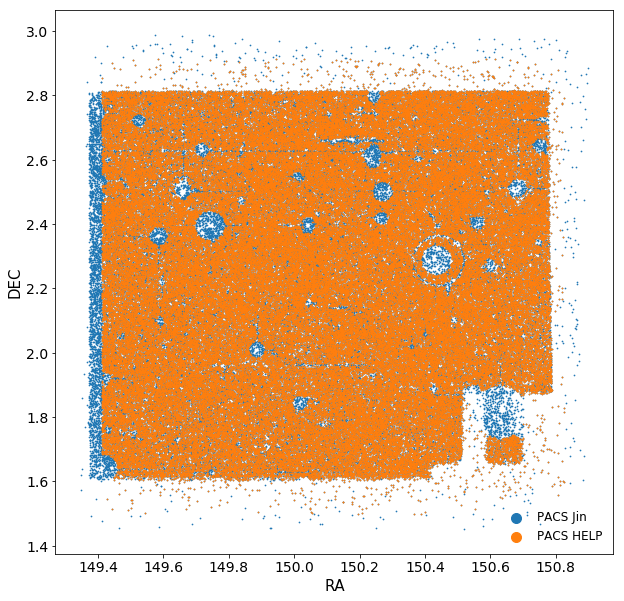

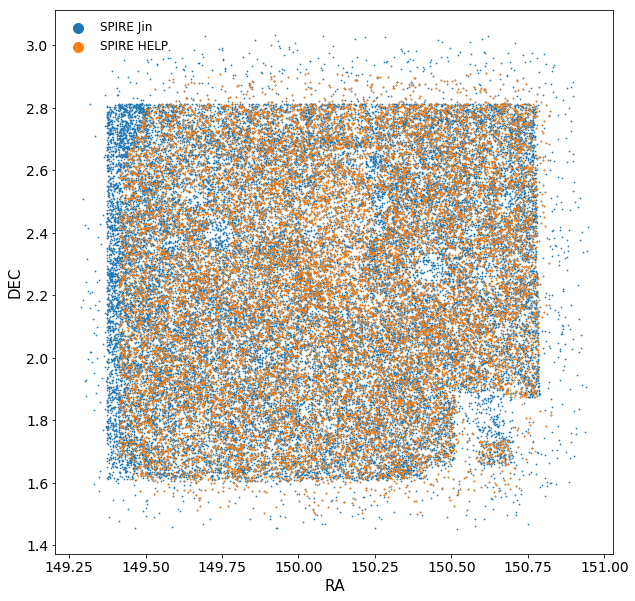

In [37]:
pacs_help = HELP_Jin[HELP_Jin['help_f_pacs_green'] > 0] 
pacs_jin  = HELP_Jin[HELP_Jin['F100'] > 0] 

plt.figure(figsize = (10,10))
ce = plt.scatter(pacs_jin['RA'], pacs_jin['DEC'], s = 0.5, label = 'PACS Jin')
plt.scatter(pacs_help['RA'], pacs_help['DEC'], s = 0.5, label = 'PACS HELP')
plt.xlabel('RA', fontsize = 15)
plt.ylabel('DEC', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

spire_help = HELP_Jin[HELP_Jin['help_f_spire_250'] > 0] 
spire_jin  = HELP_Jin[HELP_Jin['F250'] > 0] 

plt.figure(figsize = (10,10))
ce = plt.scatter(spire_jin['RA'], spire_jin['DEC'], s = 0.5, label = 'SPIRE Jin')
plt.scatter(spire_help['RA'], spire_help['DEC'], s = 0.5, label = 'SPIRE HELP')
plt.xlabel('RA', fontsize = 15)
plt.ylabel('DEC', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

In [5]:
PACS_original = Table.read('/home/jvilla/Downloads/dmu26_XID+PACS_COSMOS_20170303.fits', format = 'fits')
SPIRE_original = Table.read('/home/jvilla/Downloads/dmu26_XID+SPIRE_COSMOS_20161129.fits', format = 'fits')
fmos = Table.read('/data//3DHST_Data/'
                  'FMOS_COSMOS_sample/FMOS_COSMOS_CIGALE.fits', format = 'fits')
laigle_16      = Table.read('/data//3DHST_Data/'
                            'COSMOS/COSMOS_Laigle/COSMOS2015_Laigle+_v1.1.fits', format = 'fits')

print(len(PACS_original))
print(len(SPIRE_original))
print(len(fmos))
print(len(laigle_16))

320092
44310
5484
1182108


In [6]:
PACS_original = Table.read('/data/3DHST_Data/COSMOS/COSMOS_HELP/dmu26_XID+PACS_COSMOS_20170303.fits', format = 'fits')
SPIRE_original = Table.read('/data/3DHST_Data/COSMOS/COSMOS_HELP/dmu26_XID+SPIRE_COSMOS_20161129.fits', format = 'fits')

print(len(PACS_original))
print(len(SPIRE_original))

320092
44310


273
199
61
138


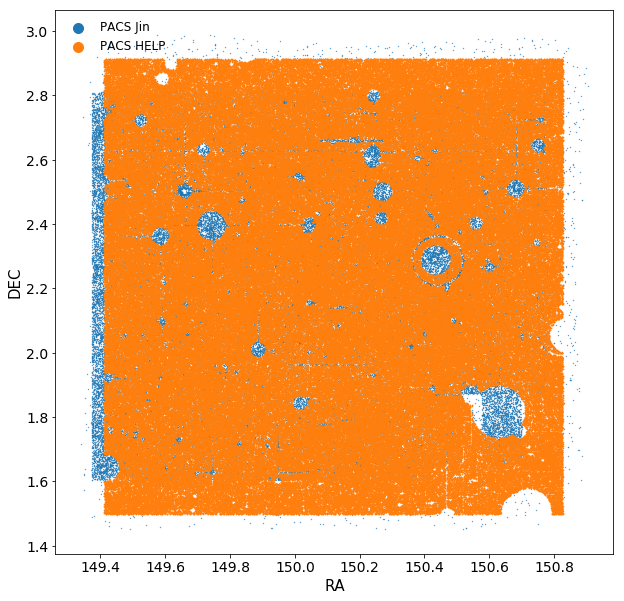

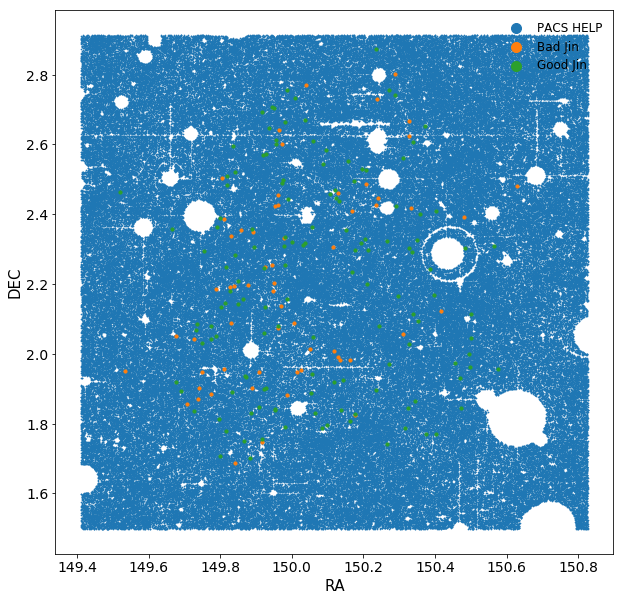

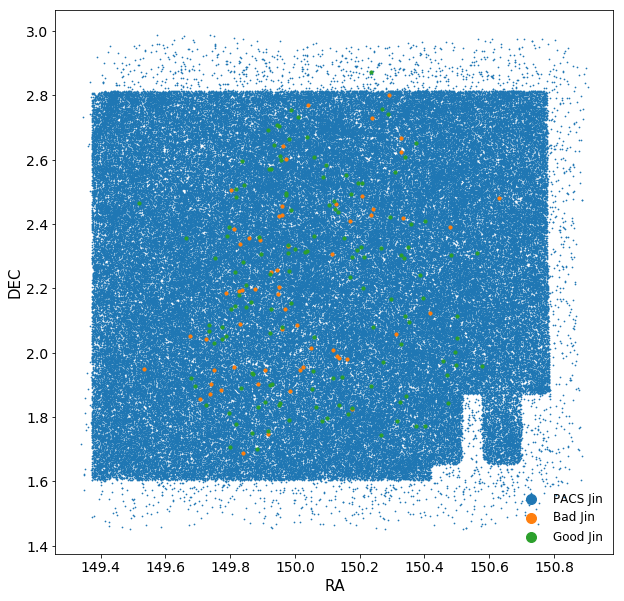

In [33]:
mask_Ha   = (cosmos_jin_2019_redshift['line.H-alpha']/cosmos_jin_2019_redshift['line.H-alpha_err']>3)
mask_OIII = (cosmos_jin_2019_redshift['line.OIII-500.7']/cosmos_jin_2019_redshift['line.OIII-500.7_err']>3)

cosmos_jin_2019_redshift_HaOIII = cosmos_jin_2019_redshift[mask_Ha&mask_OIII]
print(len(cosmos_jin_2019_redshift_HaOIII))

mask_1 = (cosmos_jin_2019_redshift_HaOIII['spitzer.mips.24']/cosmos_jin_2019_redshift_HaOIII['spitzer.mips.24_err'] > 3)

cosmos_jin_2019_redshift_HaOIII_mips = cosmos_jin_2019_redshift_HaOIII[mask_1]
print(len(cosmos_jin_2019_redshift_HaOIII_mips))

mask_bad_jin = (100*(cosmos_jin_2019_redshift_HaOIII_mips['F100']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100']< -90)
mask_good_jin = (100*(cosmos_jin_2019_redshift_HaOIII_mips['F100']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100']> -90)

cosmos_jin_2019_redshift_HaOIII_mips_bad_jin = cosmos_jin_2019_redshift_HaOIII_mips[mask_bad_jin]
print(len(cosmos_jin_2019_redshift_HaOIII_mips_bad_jin))

cosmos_jin_2019_redshift_HaOIII_mips_good_jin = cosmos_jin_2019_redshift_HaOIII_mips[mask_good_jin]
print(len(cosmos_jin_2019_redshift_HaOIII_mips_good_jin))

pacs_help = PACS_original[PACS_original['F_PACS_100'] > 0] 
pacs_jin  = JIN_original[JIN_original['F100'] > 0]

plt.figure(figsize = (10,10))
plt.scatter(pacs_jin['RA'], pacs_jin['DEC'], s = 0.1, label = 'PACS Jin')
plt.scatter(pacs_help['RA'], pacs_help['Dec'], s = 0.5, label = 'PACS HELP')
plt.xlabel('RA', fontsize = 15)
plt.ylabel('DEC', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize = (10,10))
# plt.scatter(pacs_jin['RA'], pacs_jin['DEC'], s = 0.5)
plt.scatter(pacs_help['RA'], pacs_help['Dec'], s = 0.5, label = 'PACS HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_bad_jin['ra_1'],\
            cosmos_jin_2019_redshift_HaOIII_mips_bad_jin['dec_1'], s = 10, label = 'Bad Jin')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_good_jin['ra_1'],\
            cosmos_jin_2019_redshift_HaOIII_mips_good_jin['dec_1'], s = 10, label = 'Good Jin')
plt.xlabel('RA', fontsize = 15)
plt.ylabel('DEC', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'upper right',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize = (10,10))
plt.scatter(pacs_jin['RA'], pacs_jin['DEC'], s = 0.5, label = 'PACS Jin')
# plt.scatter(pacs_help['RA'], pacs_help['Dec'], s = 0.5)
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_bad_jin['ra_1'],\
            cosmos_jin_2019_redshift_HaOIII_mips_bad_jin['dec_1'], s = 10, label = 'Bad Jin')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_good_jin['ra_1'],\
            cosmos_jin_2019_redshift_HaOIII_mips_good_jin['dec_1'], s = 10, label = 'Good Jin')
plt.xlabel('RA', fontsize = 15)
plt.ylabel('DEC', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

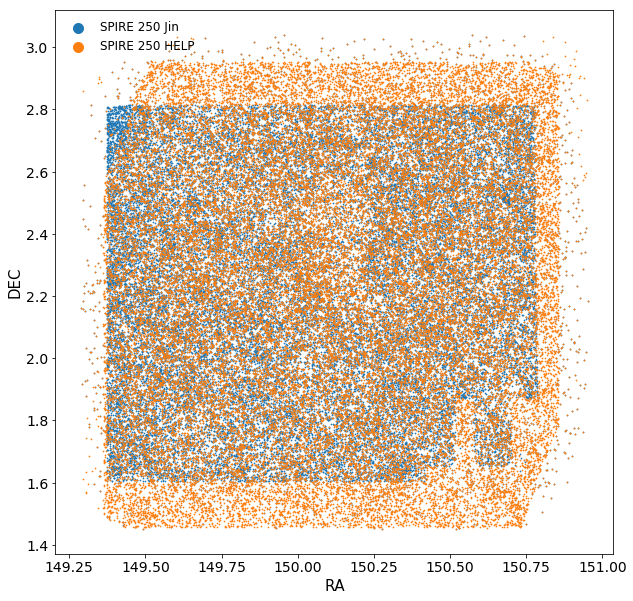

In [34]:
spire_help = SPIRE_original[SPIRE_original['F_SPIRE_250'] > 0] 
spire_jin  = JIN_original[JIN_original['F250'] > 0]


plt.figure(figsize = (10,10))
plt.scatter(spire_jin['RA'], spire_jin['DEC'], s = 0.5, label = 'SPIRE 250 Jin')
plt.scatter(spire_help['RA'], spire_help['Dec'], s = 0.5, label = 'SPIRE 250 HELP')
plt.xlabel('RA', fontsize = 15)
plt.ylabel('DEC', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

# spire_help = SPIRE_original[SPIRE_original['F_SPIRE_250']/SPIRE_original['FErr_SPIRE_250_l'] > 3] 
# spire_jin  = JIN_original[JIN_original['F250']/JIN_original['DF250'] > 3]

# plt.figure(figsize = (10,10))
# plt.scatter(spire_jin['RA'], spire_jin['DEC'], s = 0.5, label = 'SPIRE 250 Jin')
# plt.scatter(spire_help['RA'], spire_help['Dec'], s = 0.5)
# marker_size = 100
# def update_prop(handle, orig):
#     handle.update_from(orig)
#     handle.set_sizes([marker_size])
# plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
#            handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

In [41]:
# I only want data with Ha and [OIII]
# FMOS observes [0.9-1.8 mum]
# Valid range for Ha and [OIII] is 1.38 < z < 2.60

cosmos_2019_redshift = cosmos_2019[(cosmos_2019['redshift']>1.38)&(cosmos_2019['redshift']<2.6)]
print(len(cosmos_2019_redshift))

cosmos_jin_2019_redshift = cosmos_jin_2019[(cosmos_jin_2019['redshift']>1.38)&(cosmos_jin_2019['redshift']<2.6)]
print(len(cosmos_jin_2019_redshift))

1402
1319


In [42]:
mask_Ha   = (cosmos_2019_redshift['line.H-alpha']/cosmos_2019_redshift['line.H-alpha_err']>3)
mask_OIII = (cosmos_2019_redshift['line.OIII-500.7']/cosmos_2019_redshift['line.OIII-500.7_err']>3)

cosmos_2019_redshift_HaOIII = cosmos_2019_redshift[mask_Ha&mask_OIII]
print(len(cosmos_2019_redshift_HaOIII))

mask_1 = (cosmos_2019_redshift_HaOIII['spitzer.mips.24']/cosmos_2019_redshift_HaOIII['spitzer.mips.24_err'] > 3)

cosmos_2019_redshift_HaOIII_mips = cosmos_2019_redshift_HaOIII[mask_1]
print(len(cosmos_2019_redshift_HaOIII_mips))

294
208


In [43]:
mask_Ha   = (cosmos_jin_2019_redshift['line.H-alpha']/cosmos_jin_2019_redshift['line.H-alpha_err']>3)
mask_OIII = (cosmos_jin_2019_redshift['line.OIII-500.7']/cosmos_jin_2019_redshift['line.OIII-500.7_err']>3)

cosmos_jin_2019_redshift_HaOIII = cosmos_jin_2019_redshift[mask_Ha&mask_OIII]
print(len(cosmos_jin_2019_redshift_HaOIII))

mask_1 = (cosmos_jin_2019_redshift_HaOIII['spitzer.mips.24']/cosmos_jin_2019_redshift_HaOIII['spitzer.mips.24_err'] > 3)

cosmos_jin_2019_redshift_HaOIII_mips = cosmos_jin_2019_redshift_HaOIII[mask_1]
print(len(cosmos_jin_2019_redshift_HaOIII_mips))

cosmos_jin_2019_redshift_HaOIII_mips_71 = cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3>71]
cosmos_jin_2019_redshift_HaOIII_mips_pacs100 = cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100']/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100_err']>3]
cosmos_jin_2019_redshift_HaOIII_mips_pacs160 = cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.160']/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.160_err']>3]
cosmos_jin_2019_redshift_HaOIII_mips_spire250 = cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW']/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW_err']>3]
cosmos_jin_2019_redshift_HaOIII_mips_spire350 = cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PMW']/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PMW_err']>3]
cosmos_jin_2019_redshift_HaOIII_mips_spire500 = cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW']/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW_err']>3]


273
199


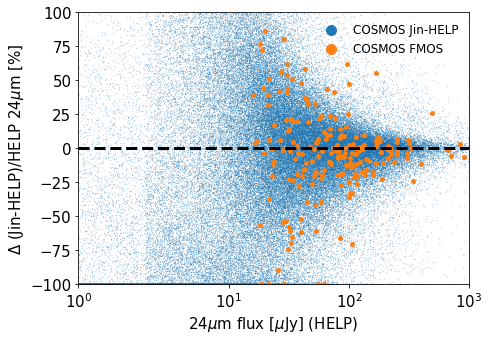

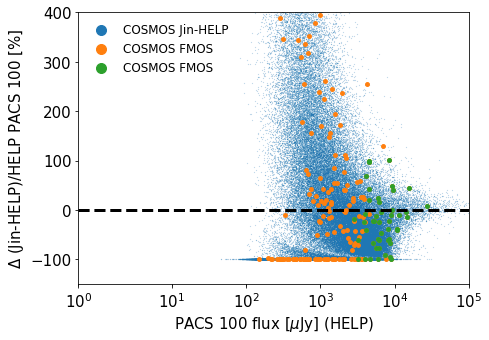

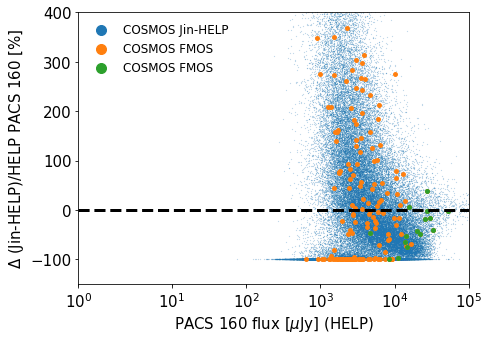

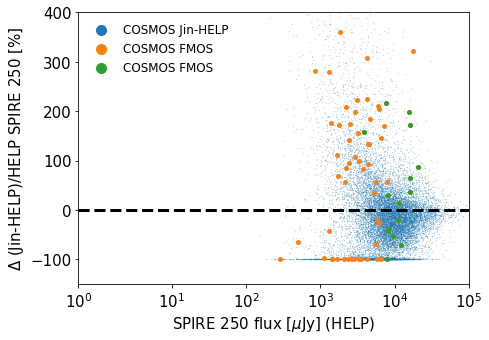

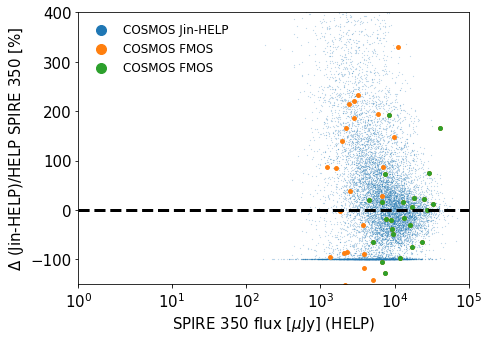

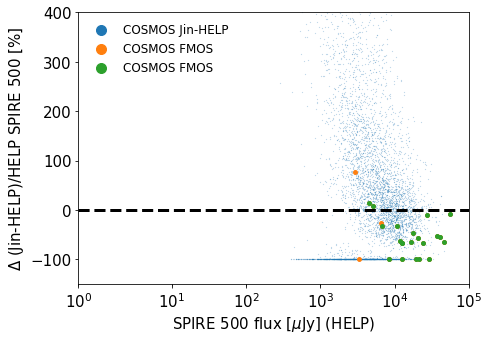

In [74]:
plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_mips_24'], 100*(HELP_Jin['F24']*1e3-HELP_Jin['help_f_mips_24'])/HELP_Jin['help_f_mips_24'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F24']-cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F24']-cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24'], c = 'C2', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['F24']-cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.ylim(-100, 100)
plt.xlim(1, 1e3)
plt.xscale('symlog')
plt.xlabel(r'24$\mu$m flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP 24$\mu$m [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

# plt.figure(figsize=(7,5))
# ce = plt.scatter(HELP_Jin['F24']*1e3, 100*(HELP_Jin['F24']*1e3-HELP_Jin['help_f_mips_24'])/HELP_Jin['help_f_mips_24'], s = 0.01, label = 'COSMOS Jin-HELP')
# # plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['F24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F24']-cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# # plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F24']-cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24'], c = 'C2', s = 15, label = 'COSMOS FMOS')
# # plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['F24']-cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24'], c = 'C2', s = 15, label = 'COSMOS FMOS')
# plt.axhline(0, c = 'k', lw = 3, ls = '--')
# plt.ylim(-100, 100)
# plt.xlim(1, 1e3)
# plt.xscale('symlog')
# plt.xlabel(r'24$\mu$m flux [$\mu$Jy] (Jin)', fontsize = 15)
# plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP 24$\mu$m [%]', fontsize = 15)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
# marker_size = 100
# def update_prop(handle, orig):
#     handle.update_from(orig)
#     handle.set_sizes([marker_size])
# plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
#            handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_pacs_green'], 100*(HELP_Jin['F100']*1e3-HELP_Jin['help_f_pacs_green'])/HELP_Jin['help_f_pacs_green'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F100']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.100']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F100']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.100'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.100'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['herschel.pacs.100']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['F100']-cosmos_jin_2019_redshift_HaOIII_mips_pacs100['herschel.pacs.100'])/cosmos_jin_2019_redshift_HaOIII_mips_pacs100['herschel.pacs.100'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.ylim(-150, 400)
# plt.ylim(-100, 100)
plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.xlabel(r'PACS 100 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP PACS 100 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_pacs_red'], 100*(HELP_Jin['F160']*1e3-HELP_Jin['help_f_pacs_red'])/HELP_Jin['help_f_pacs_red'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.160']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F160']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.160'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.160'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.160']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F160']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.160'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.160'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_pacs160['herschel.pacs.160']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_pacs160['F160']-cosmos_jin_2019_redshift_HaOIII_mips_pacs160['herschel.pacs.160'])/cosmos_jin_2019_redshift_HaOIII_mips_pacs160['herschel.pacs.160'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.axhline(0, c = 'k', lw = 3, ls = '--')
# plt.ylim(-100, 100)
plt.ylim(-150, 400)
plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.xlabel(r'PACS 160 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP PACS 160 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_spire_250'], 100*(HELP_Jin['F250']*1e3-HELP_Jin['help_f_spire_250'])/HELP_Jin['help_f_spire_250'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F250']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PLW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F250']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PLW'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PLW'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_spire250['herschel.spire.PLW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_spire250['F250']-cosmos_jin_2019_redshift_HaOIII_mips_spire250['herschel.spire.PLW'])/cosmos_jin_2019_redshift_HaOIII_mips_spire250['herschel.spire.PLW'], c = 'C2', s = 15, label = 'COSMOS FMOS')

plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.ylim(-150, 400)
# plt.ylim(-100, 100)
plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.xlabel(r'SPIRE 250 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP SPIRE 250 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_spire_350'], 100*(HELP_Jin['F350']*1e3-HELP_Jin['help_f_spire_350'])/HELP_Jin['help_f_spire_350'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PMW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F350']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PMW'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PMW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F350']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PMW'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PLW'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_spire350['herschel.spire.PMW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_spire350['F350']-cosmos_jin_2019_redshift_HaOIII_mips_spire350['herschel.spire.PMW'])/cosmos_jin_2019_redshift_HaOIII_mips_spire350['herschel.spire.PLW'], c = 'C2', s = 15, label = 'COSMOS FMOS')

plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.ylim(-150, 400)
# plt.ylim(-100, 100)
plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.xlabel(r'SPIRE 350 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP SPIRE 350 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_spire_500'], 100*(HELP_Jin['F500']*1e3-HELP_Jin['help_f_spire_500'])/HELP_Jin['help_f_spire_500'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F500']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PSW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F500']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PSW'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PSW'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_spire500['herschel.spire.PSW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_spire500['F500']-cosmos_jin_2019_redshift_HaOIII_mips_spire500['herschel.spire.PSW'])/cosmos_jin_2019_redshift_HaOIII_mips_spire500['herschel.spire.PSW'], c = 'C2', s = 15, label = 'COSMOS FMOS')

plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.ylim(-150, 400)
# plt.ylim(-100, 100)
plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.xlabel(r'SPIRE 500 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP SPIRE 500 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

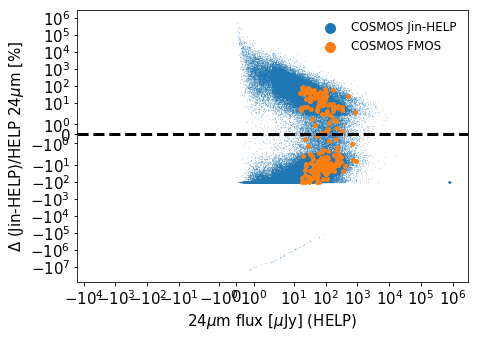

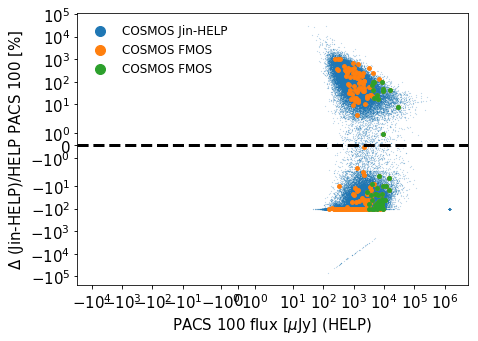

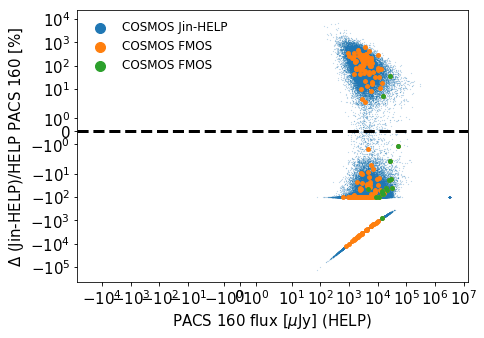

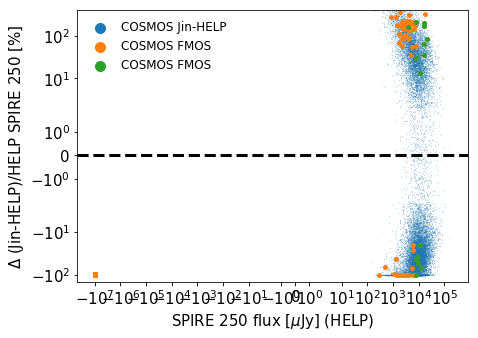

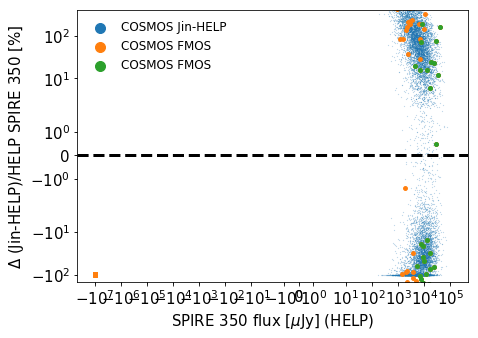

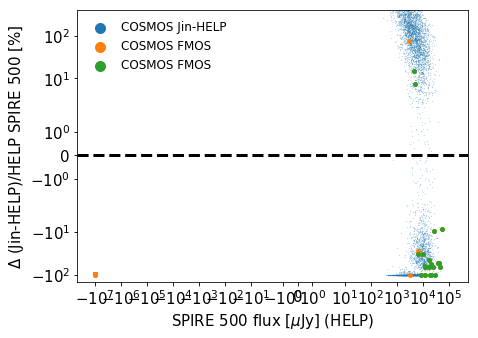

In [75]:
plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_mips_24'], 100*(HELP_Jin['F24']*1e3-HELP_Jin['help_f_mips_24'])/HELP_Jin['help_f_mips_24'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F24']-cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F24']-cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips_71['spitzer.mips.24'], c = 'C2', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['F24']-cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24'])/cosmos_jin_2019_redshift_HaOIII_mips_pacs100['spitzer.mips.24'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.xscale('symlog')
plt.yscale('symlog')
plt.axhline(0, c = 'k', lw = 3, ls = '--')
# plt.ylim(-200, 200)
# plt.xlim(1, 1e3)
plt.xscale('symlog')
plt.xlabel(r'24$\mu$m flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP 24$\mu$m [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_pacs_green'], 100*(HELP_Jin['F100']*1e3-HELP_Jin['help_f_pacs_green'])/HELP_Jin['help_f_pacs_green'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F100']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.100'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.100']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F100']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.100'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.100'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['herschel.pacs.100']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_pacs100['F100']-cosmos_jin_2019_redshift_HaOIII_mips_pacs100['herschel.pacs.100'])/cosmos_jin_2019_redshift_HaOIII_mips_pacs100['herschel.pacs.100'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.xscale('symlog')
plt.yscale('symlog')
# plt.ylim(-150, 400)
# plt.ylim(-100, 100)
# plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.xlabel(r'PACS 100 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP PACS 100 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_pacs_red'], 100*(HELP_Jin['F160']*1e3-HELP_Jin['help_f_pacs_red'])/HELP_Jin['help_f_pacs_red'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.160']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F160']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.160'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.pacs.160'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.160']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F160']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.160'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.pacs.160'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_pacs160['herschel.pacs.160']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_pacs160['F160']-cosmos_jin_2019_redshift_HaOIII_mips_pacs160['herschel.pacs.160'])/cosmos_jin_2019_redshift_HaOIII_mips_pacs160['herschel.pacs.160'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.xscale('symlog')
plt.yscale('symlog')
# plt.ylim(-100, 100)
# plt.ylim(-150, 400)
# plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.xlabel(r'PACS 160 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP PACS 160 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_spire_250'], 100*(HELP_Jin['F250']*1e3-HELP_Jin['help_f_spire_250'])/HELP_Jin['help_f_spire_250'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F250']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PLW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F250']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PLW'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PLW'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_spire250['herschel.spire.PLW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_spire250['F250']-cosmos_jin_2019_redshift_HaOIII_mips_spire250['herschel.spire.PLW'])/cosmos_jin_2019_redshift_HaOIII_mips_spire250['herschel.spire.PLW'], c = 'C2', s = 15, label = 'COSMOS FMOS')

plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.ylim(-150, 400)
# plt.ylim(-100, 100)
# plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'SPIRE 250 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP SPIRE 250 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_spire_350'], 100*(HELP_Jin['F350']*1e3-HELP_Jin['help_f_spire_350'])/HELP_Jin['help_f_spire_350'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PMW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F350']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PMW'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PLW'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PMW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F350']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PMW'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PLW'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_spire350['herschel.spire.PMW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_spire350['F350']-cosmos_jin_2019_redshift_HaOIII_mips_spire350['herschel.spire.PMW'])/cosmos_jin_2019_redshift_HaOIII_mips_spire350['herschel.spire.PLW'], c = 'C2', s = 15, label = 'COSMOS FMOS')

plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.ylim(-150, 400)
# plt.ylim(-100, 100)
# plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'SPIRE 350 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP SPIRE 350 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

plt.figure(figsize=(7,5))
ce = plt.scatter(HELP_Jin['help_f_spire_500'], 100*(HELP_Jin['F500']*1e3-HELP_Jin['help_f_spire_500'])/HELP_Jin['help_f_spire_500'], s = 0.01, label = 'COSMOS Jin-HELP')
# plt.scatter(cosmos_jin_2019['spitzer.mips.24']*1e3, 100*(cosmos_jin_2019['F24']-cosmos_jin_2019['spitzer.mips.24'])/cosmos_jin_2019['spitzer.mips.24'], s = 4, label = 'COSMOS Jin-HELP')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips['F500']-cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW'])/cosmos_jin_2019_redshift_HaOIII_mips['herschel.spire.PSW'], c = 'C1', s = 15, label = 'COSMOS FMOS')
# plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PSW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_71['F500']-cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PSW'])/cosmos_jin_2019_redshift_HaOIII_mips_71['herschel.spire.PSW'], c = 'C2', s = 15, label = 'COSMOS FMOS')
plt.scatter(cosmos_jin_2019_redshift_HaOIII_mips_spire500['herschel.spire.PSW']*1e3, 100*(cosmos_jin_2019_redshift_HaOIII_mips_spire500['F500']-cosmos_jin_2019_redshift_HaOIII_mips_spire500['herschel.spire.PSW'])/cosmos_jin_2019_redshift_HaOIII_mips_spire500['herschel.spire.PSW'], c = 'C2', s = 15, label = 'COSMOS FMOS')

plt.axhline(0, c = 'k', lw = 3, ls = '--')
plt.ylim(-150, 400)
# plt.ylim(-100, 100)
# plt.xlim(1, 1e5)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'SPIRE 500 flux [$\mu$Jy] (HELP)', fontsize = 15)
plt.ylabel(r'$\Delta$ (Jin-HELP)/HELP SPIRE 500 [%]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'best',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

In [202]:
# Band names in each catalog 

HELP_Jin        = Table.read('/data/3DHST_Data/Final_samples/test_Jin_HELP_COSMOS_2019/HELPJIN.fits', format = 'fits')

HELP_Jin = HELP_Jin.to_pandas()
HELP_Jin = HELP_Jin.fillna(-99.0)
HELP_Jin = Table.from_pandas(HELP_Jin)

bands_jin  = ['F24', 'F100' ,'F160',\
              'F250', 'F350', 'F500']

jin_err    = ['DF24', 'DF100' ,'DF160',\
              'DF250', 'DF350', 'DF500']

bands_help = ['help_f_mips_24', 'help_f_pacs_green','help_f_pacs_red',\
              'help_f_spire_250', 'help_f_spire_350','help_f_spire_500']

help_err   = ['help_ferr_mips_24', 'help_ferr_pacs_green','help_ferr_pacs_red',\
              'help_ferr_spire_250', 'help_ferr_spire_350','help_ferr_spire_500']

bands      = ['24', '100', '160',\
             '250', '350', '500'] 

# Convert from μJy to mJy
for col in ['help_f_mips_24', 'help_ferr_mips_24',\
            'help_f_pacs_green','help_ferr_pacs_green',\
            'help_f_pacs_red','help_ferr_pacs_red',\
            'help_f_spire_250','help_ferr_spire_250',\
            'help_f_spire_350','help_ferr_spire_350',\
            'help_f_spire_500','help_ferr_spire_500']:
    HELP_Jin[col] *= 1e-3
      

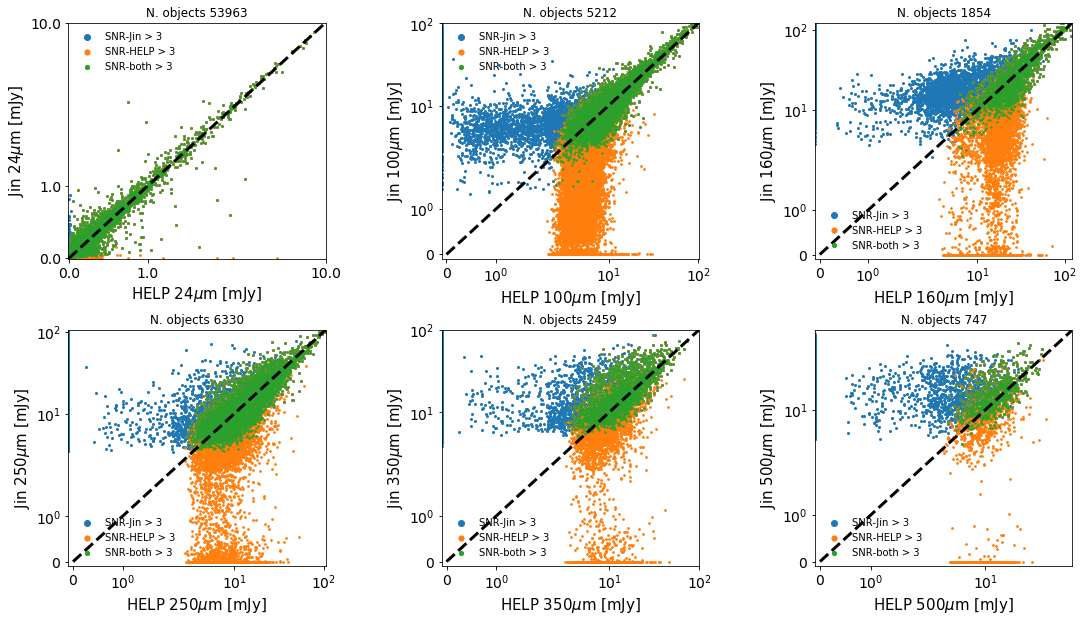

In [208]:
# Plots for the three different SNR scenarios in our sample

X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = HELP_Jin[bands_help[i]]
    y = HELP_Jin[bands_jin[i]]
    
#     For the SNR
    snr_1 = HELP_Jin[bands_jin[i]]/HELP_Jin[jin_err[i]]
    snr_2 = HELP_Jin[bands_help[i]]/HELP_Jin[help_err[i]]
    
#     For the contraints
    l     = HELP_Jin[snr_1 > 3]
    m     = HELP_Jin[snr_2 > 3]
    n     = HELP_Jin[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i].scatter(l[bands_help[i]], l[bands_jin[i]], s = 4, c = 'C0', label = 'SNR-Jin > 3')
    axs[i].scatter(m[bands_help[i]], m[bands_jin[i]], s = 3, c = 'C1', label = 'SNR-HELP > 3')
    axs[i].scatter(n[bands_help[i]], n[bands_jin[i]], s = 2, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i].plot(X, X, '--', lw = 3, c = 'k')
    axs[i].set_ylabel('Jin %s$\mu$m [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('HELP %s$\mu$m [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(-0.1, np.nanpercentile(y, 99.9)+50)
    axs[i].set_ylim(-0.1, np.nanpercentile(y, 99.9)+50)
    axs[i].set_title('N. objects %i'%len(n[bands_help[i]]))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'best')
    
    if (i == 0):
        axs[i].set_xlim(-0.01, 10)
        axs[i].set_ylim(-0.01, 10)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
    marker_size = 100
    def update_prop(handle, orig):
        handle.update_from(orig)
        handle.set_sizes([marker_size])
        axs[i].legend(frameon = False, prop = {'size': 12}, loc = 'best',\
                   handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})          

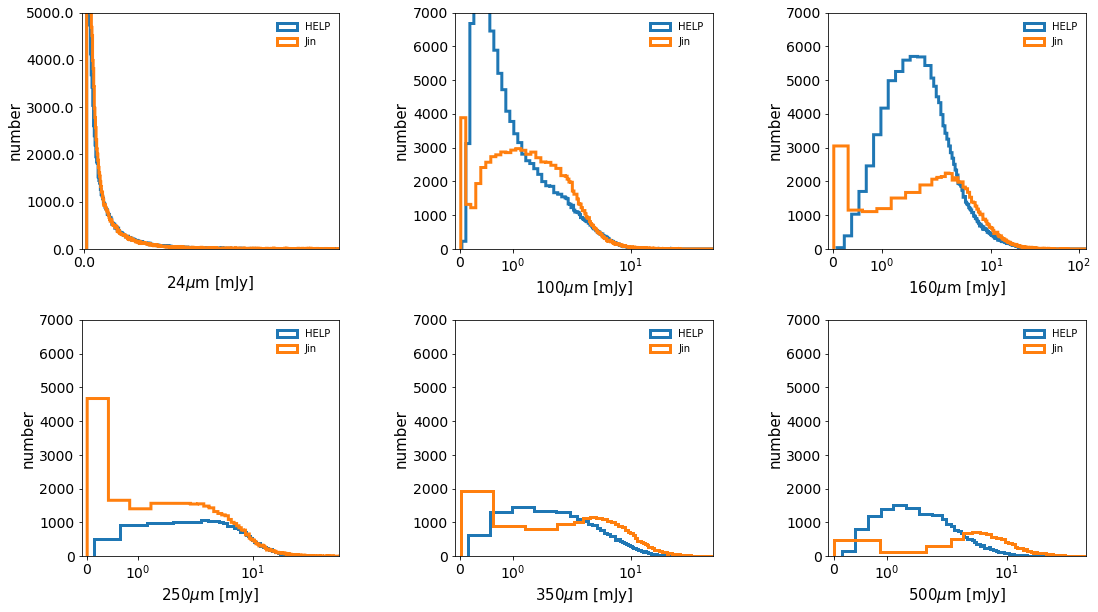

In [241]:
# Plots for the three different SNR scenarios in our sample

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = HELP_Jin[bands_help[i]]
    y = HELP_Jin[bands_jin[i]]
    
    x = x[x > 0.01]
    y = y[y > 0.01]

    axs[i].hist(x, bins = 'auto', histtype = 'step', lw = 3, label = 'HELP')
    axs[i].hist(y, bins = 'auto', histtype = 'step', lw = 3, label = 'Jin')
    
    axs[i].set_ylabel('number', fontsize = 15)
    axs[i].set_xlabel('%s$\mu$m [mJy]'%bands[i], fontsize = 15)

    axs[i].set_xlim(-0.1, np.nanpercentile(y, 99.9))
    axs[i].set_ylim(-0.1, 7000) 
    axs[i].set_xscale('symlog')
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'best')
    
    if (i == 0):
        axs[i].set_xlim(-0.01, 1)
        axs[i].set_ylim(-0.01, 5000)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
    marker_size = 100
    def update_prop(handle, orig):
        handle.update_from(orig)
        handle.set_sizes([marker_size])
        axs[i].legend(frameon = False, prop = {'size': 12}, loc = 'best',\
                   handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})           

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


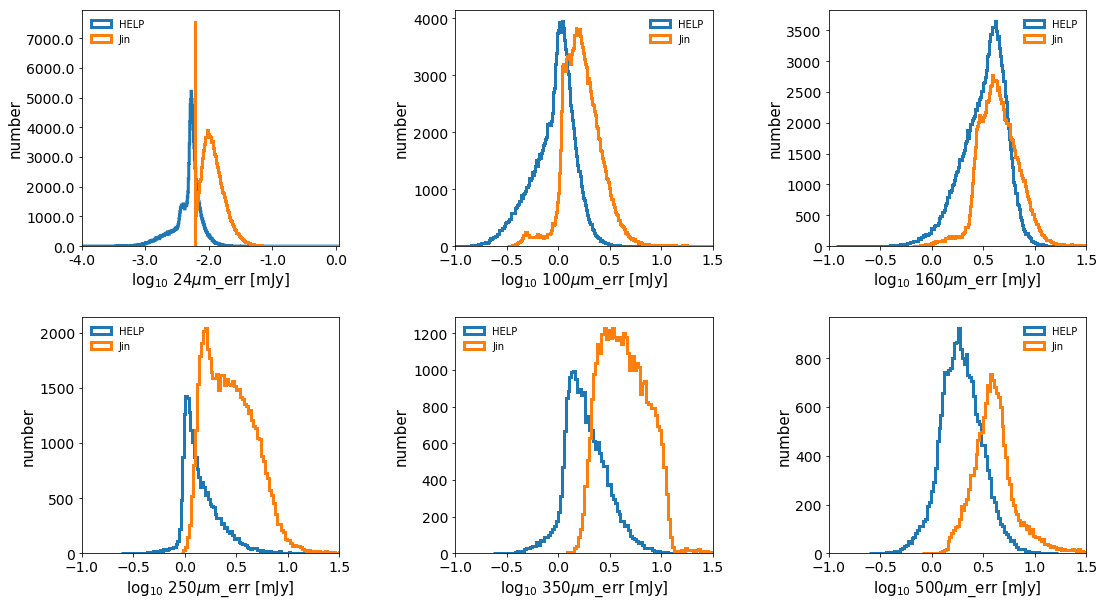

In [181]:
# Plots for the three different SNR scenarios in our sample

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
        
#     For the limits
    x = HELP_Jin[help_err[i]]
    y = HELP_Jin[jin_err[i]]
    
    x = x[x > 0]
    y = y[(y > 0)&(y<100)] 
    
    
#     l = l[l[help_err[i]]>0]
#     m = m[m[jin_err[i]]>0]

    axs[i].hist(np.log10(x), bins = 'auto', histtype = 'step', lw = 3, label = 'HELP')
    axs[i].hist(np.log10(y), bins = 'auto', histtype = 'step', lw = 3, label = 'Jin')
    
    axs[i].set_ylabel('number', fontsize = 15)
    axs[i].set_xlabel('log$_{10}$ %s$\mu$m_err [mJy]'%bands[i], fontsize = 15)

    axs[i].set_xlim(-1, 1.5)
#     axs[i].set_ylim(-0.1, 4000) 
#     axs[i].set_xscale('symlog')
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'best')
    
    if (i == 0):
        axs[i].set_xlim(-4, 0.05)
#         axs[i].set_ylim(-0.01, 4000)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
    marker_size = 100
    def update_prop(handle, orig):
        handle.update_from(orig)
        handle.set_sizes([marker_size])
        axs[i].legend(frameon = False, prop = {'size': 12}, loc = 'best',\
                   handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})          

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


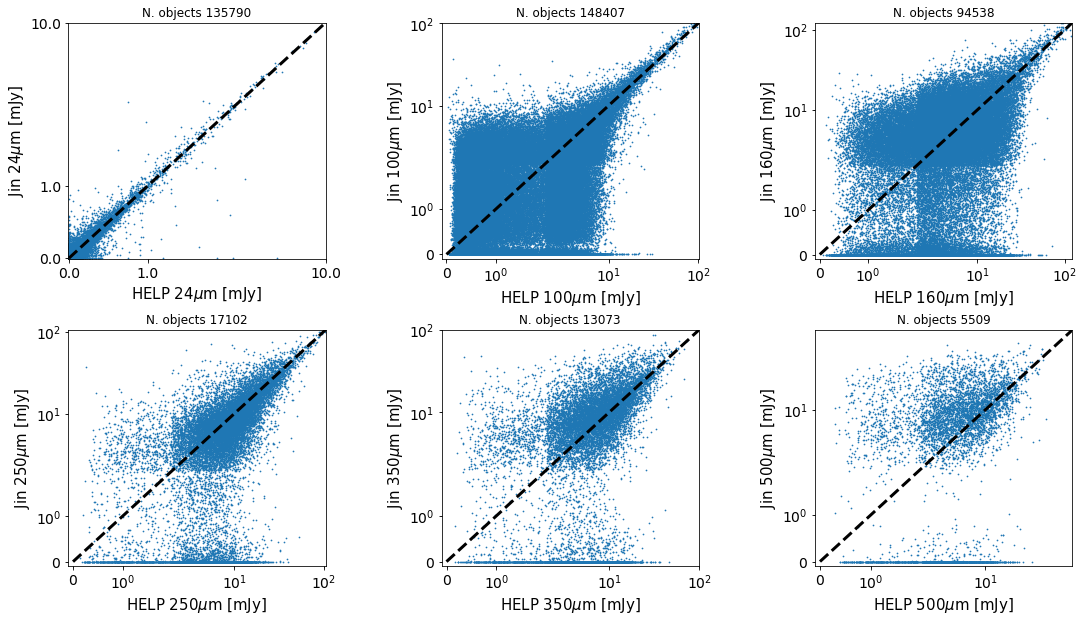

In [182]:
# Plots for the three different SNR scenarios in our sample

X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = HELP_Jin[bands_help[i]]
    y = HELP_Jin[bands_jin[i]]
    
#     For the SNR
#     snr_1 = HELP_Jin[bands_jin[i]]/HELP_Jin[jin_err[i]]
#     snr_2 = HELP_Jin[bands_help[i]]/HELP_Jin[help_err[i]]
    
#     For the contraints
    l     = HELP_Jin[(HELP_Jin[bands_help[i]]>0)&(HELP_Jin[bands_jin[i]]>0)]
#     m     = HELP_Jin[snr_2 > 3]
#     n     = HELP_Jin[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i].scatter(x, y, s = 0.5, c = 'C0')
#     axs[i].scatter(m[bands_help[i]], m[bands_jin[i]], s = 3, c = 'C1', label = 'SNR-HELP > 3')
#     axs[i].scatter(n[bands_help[i]], n[bands_jin[i]], s = 2, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i].plot(X, X, '--', lw = 3, c = 'k')
    axs[i].set_ylabel('Jin %s$\mu$m [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('HELP %s$\mu$m [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(-0.1, np.nanpercentile(y, 99.9)+50)
    axs[i].set_ylim(-0.1, np.nanpercentile(y, 99.9)+50)
    axs[i].set_title('N. objects %i'%len(l))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
#     axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'best')
    
    if (i == 0):
        axs[i].set_xlim(-0.01, 10)
        axs[i].set_ylim(-0.01, 10)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))  

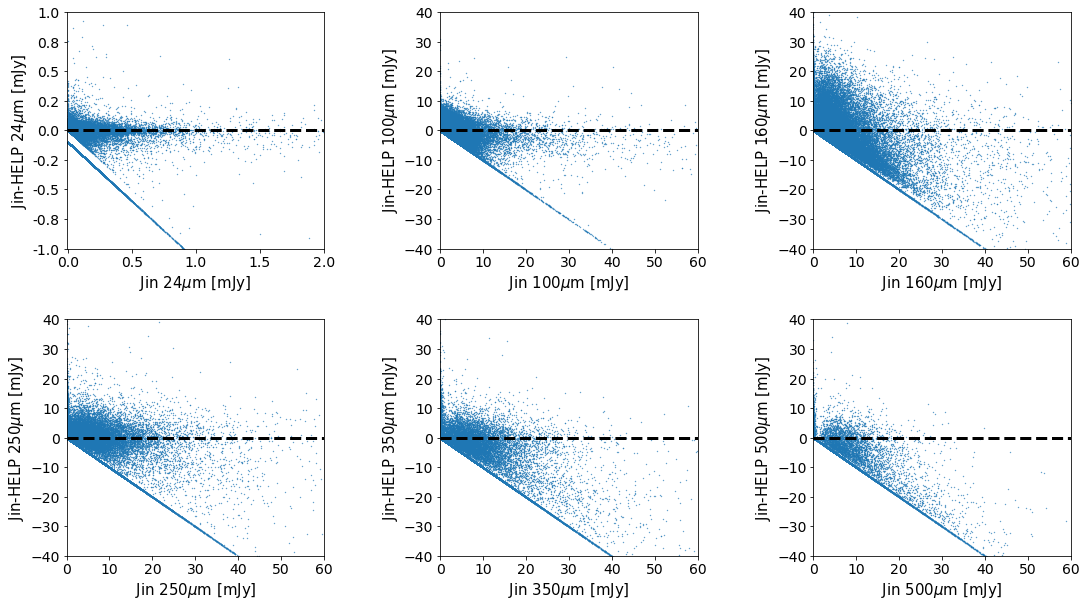

In [229]:
# Plots for the three different SNR scenarios in our sample

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = HELP_Jin[bands_help[i]]
    y = HELP_Jin[bands_jin[i]]
    
#     For the SNR
#     snr_1 = HELP_Jin[bands_jin[i]]/HELP_Jin[jin_err[i]]
#     snr_2 = HELP_Jin[bands_help[i]]/HELP_Jin[help_err[i]]
    
#     For the contraints
    l     = HELP_Jin[(HELP_Jin[bands_help[i]]>0)&(HELP_Jin[bands_jin[i]]>0)]
#     m     = HELP_Jin[snr_2 > 3]
#     n     = HELP_Jin[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i].scatter(y, x-y, s = 0.1, c = 'C0')
#     axs[i].scatter(l[bands_jin[i]], l[bands_help[i]]-l[bands_jin[i]], s = 0.1, c = 'C1')
#     axs[i].scatter(m[bands_help[i]], m[bands_jin[i]], s = 3, c = 'C1', label = 'SNR-HELP > 3')
#     axs[i].scatter(n[bands_help[i]], n[bands_jin[i]], s = 2, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i].axhline(y=0, ls='--', lw = 3, c = 'k')
    axs[i].set_ylabel('Jin-HELP %s$\mu$m [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('Jin %s$\mu$m [mJy]'%bands[i], fontsize = 15)
#     axs[i].set_xscale('symlog')
#     axs[i].set_yscale('symlog')
#     axs[i].set_xlim(-0.1, np.nanpercentile(y, 99.9)+50)
#     axs[i].set_ylim(-np.nanpercentile(y, 99.9)-50, np.nanpercentile(y, 99.9)+50)
    axs[i].set_xlim(0, 60)
    axs[i].set_ylim(-40, 40)
#     axs[i].set_title('N. objects %i'%len(l))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
#     axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'best')
    
    if (i == 0):
        axs[i].set_xlim(-0.01, 2)
        axs[i].set_ylim(-1, 1)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f')) 

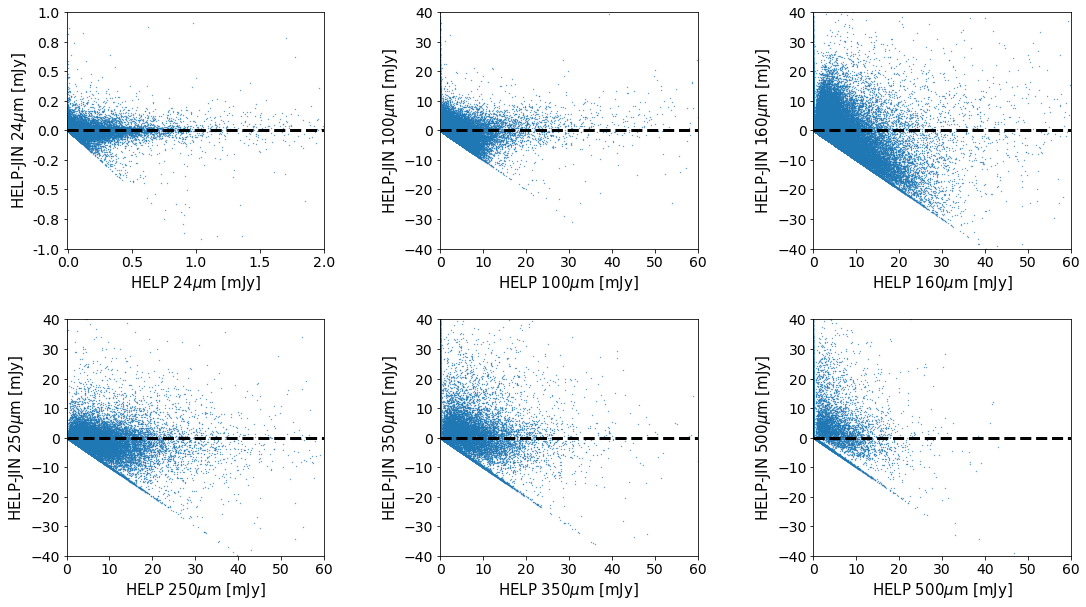

In [227]:
# Plots for the three different SNR scenarios in our sample

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = HELP_Jin[bands_help[i]]
    y = HELP_Jin[bands_jin[i]]
    
#     For the SNR
#     snr_1 = HELP_Jin[bands_jin[i]]/HELP_Jin[jin_err[i]]
#     snr_2 = HELP_Jin[bands_help[i]]/HELP_Jin[help_err[i]]
    
#     For the contraints
    l     = HELP_Jin[(HELP_Jin[bands_help[i]]>0)&(HELP_Jin[bands_jin[i]]>0)]
#     m     = HELP_Jin[snr_2 > 3]
#     n     = HELP_Jin[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i].scatter(x, y-x, s = 0.1, c = 'C0')
#     axs[i].scatter(l[bands_help[i]], l[bands_jin[i]]-l[bands_help[i]], s = 0.1, c = 'C1')
#     axs[i].scatter(m[bands_help[i]], m[bands_jin[i]], s = 3, c = 'C1', label = 'SNR-HELP > 3')
#     axs[i].scatter(n[bands_help[i]], n[bands_jin[i]], s = 2, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i].axhline(y=0, ls='--', lw = 3, c = 'k')
    axs[i].set_ylabel('HELP-JIN %s$\mu$m [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('HELP %s$\mu$m [mJy]'%bands[i], fontsize = 15)
#     axs[i].set_xscale('symlog')
#     axs[i].set_yscale('symlog')
#     axs[i].set_xlim(-0.1, np.nanpercentile(y, 99.9)+50)
#     axs[i].set_ylim(-np.nanpercentile(y, 99.9)-50, np.nanpercentile(y, 99.9)+50)
    axs[i].set_xlim(0, 60)
    axs[i].set_ylim(-40, 40)
#     axs[i].set_title('N. objects %i'%len(l))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
#     axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'best')
    
    if (i == 0):
        axs[i].set_xlim(-0.01, 2)
        axs[i].set_ylim(-1, 1)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f')) 

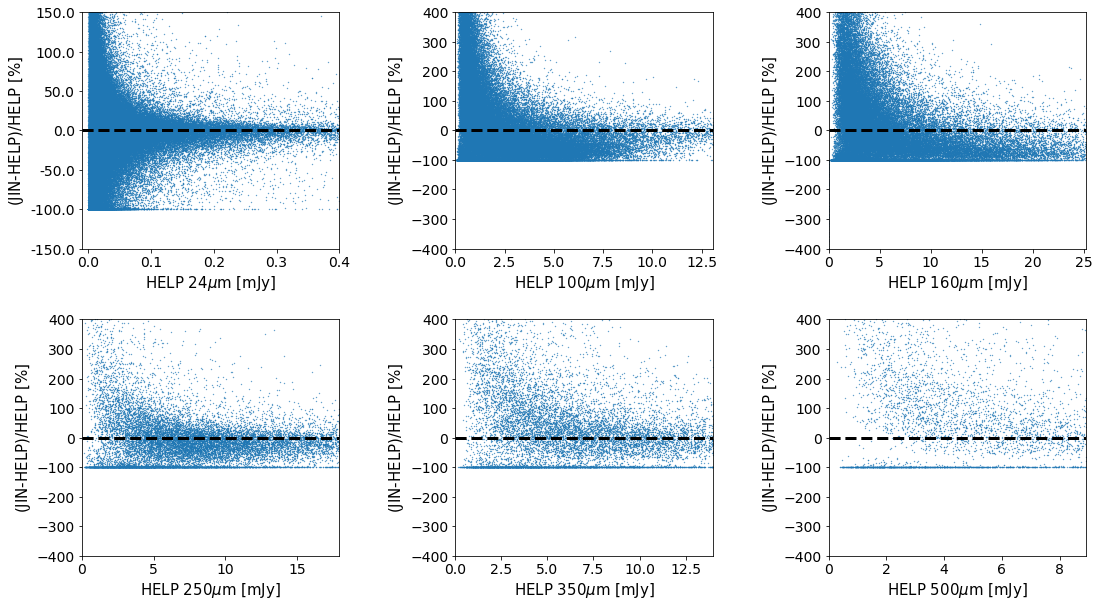

In [215]:
# Plots for the three different SNR scenarios in our sample

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = HELP_Jin[bands_help[i]]
    y = HELP_Jin[bands_jin[i]]
    
#     For the SNR
#     snr_1 = HELP_Jin[bands_jin[i]]/HELP_Jin[jin_err[i]]
#     snr_2 = HELP_Jin[bands_help[i]]/HELP_Jin[help_err[i]]
    
#     For the contraints
    l     = HELP_Jin[(HELP_Jin[bands_help[i]]>0)&(HELP_Jin[bands_jin[i]]>0)]
#     m     = HELP_Jin[snr_2 > 3]
#     n     = HELP_Jin[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i].scatter(x, 100*(y-x)/x, s = 0.1, c = 'C0')
#     axs[i].scatter(m[bands_help[i]], m[bands_jin[i]], s = 3, c = 'C1', label = 'SNR-HELP > 3')
#     axs[i].scatter(n[bands_help[i]], n[bands_jin[i]], s = 2, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i].axhline(y=0, ls='--', lw = 3, c = 'k')
    axs[i].set_ylabel('(JIN-HELP)/HELP [$\%$]', fontsize = 15)
    axs[i].set_xlabel('HELP %s$\mu$m [mJy]'%bands[i], fontsize = 15)
#     axs[i].set_xscale('symlog')
#     axs[i].set_yscale('symlog')
#     axs[i].set_xlim(-0.1, np.nanpercentile(y, 99.9)+50)
#     axs[i].set_ylim(-np.nanpercentile(y, 99.9)-50, np.nanpercentile(y, 99.9)+50)
    axs[i].set_xlim(0, np.nanpercentile(x, 99.))
    axs[i].set_ylim(-400, 400)
#     axs[i].set_title('N. objects %i'%len(l))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
#     axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'best')
    
    if (i == 0):
        axs[i].set_xlim(-0.01, 0.4)
        axs[i].set_ylim(-150, 150)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f')) 

In [231]:
# HELP_Jin[(HELP_Jin['F250']-HELP_Jin['help_f_spire_250'])/HELP_Jin['help_f_spire_250']>-4000]['help_f_spire_250'][:5]
# HELP_Jin[(HELP_Jin['F250']-HELP_Jin['help_f_spire_250'])/HELP_Jin['help_f_spire_250']>-4000]['F250'][:5]

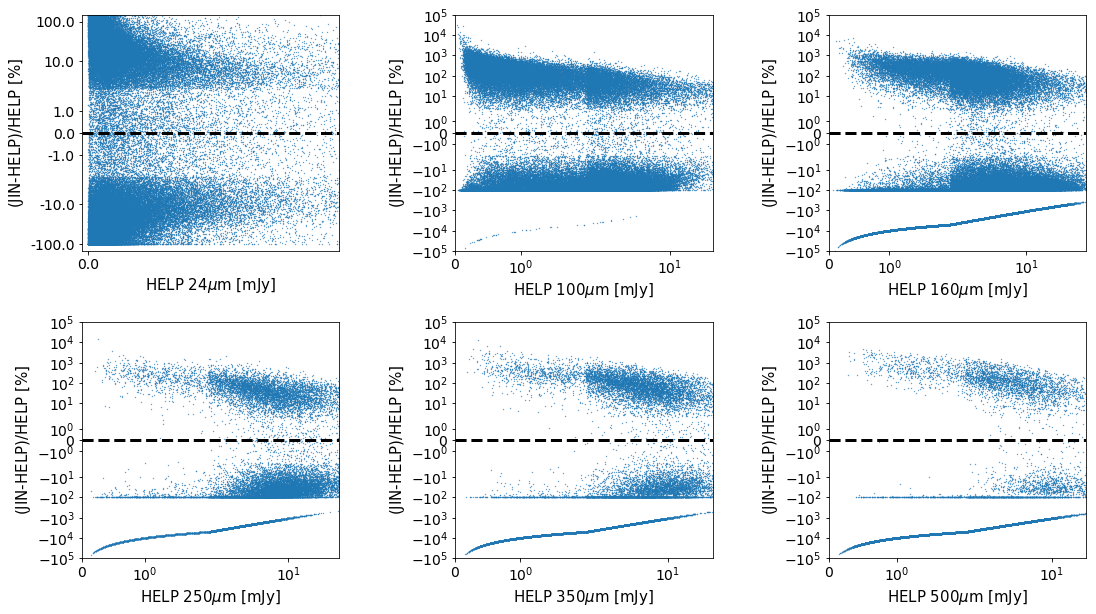

In [230]:
# Plots for the three different SNR scenarios in our sample

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = HELP_Jin[bands_help[i]]
    y = HELP_Jin[bands_jin[i]]
    
#     For the SNR
#     snr_1 = HELP_Jin[bands_jin[i]]/HELP_Jin[jin_err[i]]
#     snr_2 = HELP_Jin[bands_help[i]]/HELP_Jin[help_err[i]]
    
#     For the contraints
    l     = HELP_Jin[(HELP_Jin[bands_help[i]]>0)&(HELP_Jin[bands_jin[i]]>0)]
#     m     = HELP_Jin[snr_2 > 3]
#     n     = HELP_Jin[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i].scatter(x, 100*(y-x)/x, s = 0.1, c = 'C0')
#     axs[i].scatter(l[bands_help[i]], 100*(l[bands_jin[i]]-l[bands_help[i]])/l[bands_help[i]], s = 0.1, c = 'C1')
#     axs[i].scatter(m[bands_help[i]], m[bands_jin[i]], s = 3, c = 'C1', label = 'SNR-HELP > 3')
#     axs[i].scatter(n[bands_help[i]], n[bands_jin[i]], s = 2, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i].axhline(y=0, ls='--', lw = 3, c = 'k')
    axs[i].set_ylabel('(JIN-HELP)/HELP [$\%$]', fontsize = 15)
    axs[i].set_xlabel('HELP %s$\mu$m [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
#     axs[i].set_xlim(-0.1, np.nanpercentile(y, 99.9)+50)
#     axs[i].set_ylim(-np.nanpercentile(y, 99.9)-50, np.nanpercentile(y, 99.9)+50)
    axs[i].set_xlim(0, np.nanpercentile(x, 99.)+10)
    axs[i].set_ylim(-10**5, 10**5)
#     axs[i].set_title('N. objects %i'%len(l))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
#     axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'best')
    
    if (i == 0):
        axs[i].set_xlim(-0.01, 0.4)
        axs[i].set_ylim(-150, 150)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f')) 

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


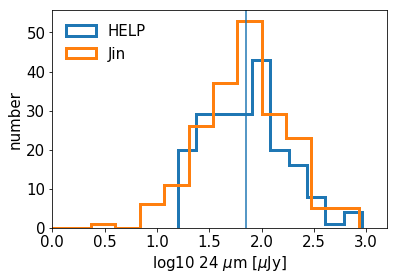

In [264]:
# plt.hist(cosmos_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3, histtype = 'step', lw = 3)
plt.hist(np.log10(cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3), histtype = 'step', lw = 3, label = 'HELP')
plt.hist(np.log10(cosmos_jin_2019_redshift_HaOIII_mips['F24']*1e3), bins = 40, histtype = 'step', lw = 3, label = 'Jin')
plt.axvline(np.log10(71), c = 'C0')
plt.xlim(0, 3.2)
plt.xlabel(r'log10 24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'best')

In [265]:
print(len(cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3<71]))
print(len(cosmos_jin_2019_redshift_HaOIII_mips[cosmos_jin_2019_redshift_HaOIII_mips['F24']*1e3<71]))

101
103


/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Data useful for the BPT-diagram 101


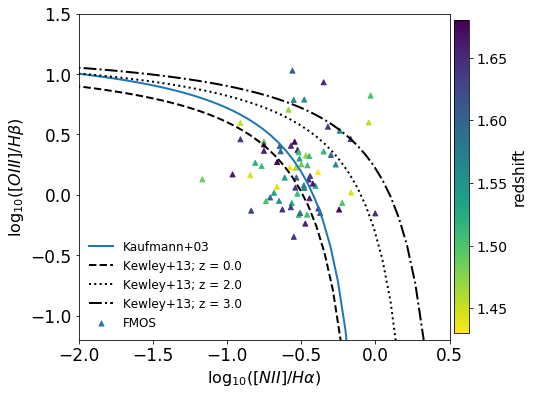

In [266]:
plt.figure(figsize=(7,6))
plt.scatter(np.log10(cosmos_2019_redshift_HaOIII_mips['line.NII-658.4']/cosmos_2019_redshift_HaOIII_mips['line.H-alpha']),\
            np.log10(cosmos_2019_redshift_HaOIII_mips['line.OIII-500.7']/cosmos_2019_redshift_HaOIII_mips['line.H-beta']),\
            s = 25, c = cosmos_2019_redshift_HaOIII_mips['redshift'], cmap = plt.cm.viridis_r, marker = '^', label = 'FMOS')
ce = plt.colorbar(fraction = 0.04, pad = 0.01)
ce.set_label(label = 'redshift', size = 15)
ce.ax.tick_params(labelsize = 14)
plt.plot(log_NIIHa_kauf, kaufmann03(log_NIIHa_kauf), c = 'k', ls = '-', lw = 2, color = 'C0', label = 'Kaufmann+03')
# plt.plot(log_NIIHa_kewl, kewley01(log_NIIHa_kewl), c = 'k', ls = '--', lw = 2)
plt.plot(log_NIIHa_kewl[:90], kewley13(log_NIIHa_kewl, z = 0)[:90], c = 'k', ls = '--', lw = 2, label = 'Kewley+13; z = 0.0')
plt.plot(log_NIIHa_kewl[:98], kewley13(log_NIIHa_kewl, z = 2)[:98], c = 'k', ls = ':', lw = 2, label = 'Kewley+13; z = 2.0')
plt.plot(log_NIIHa_kewl, kewley13(log_NIIHa_kewl, z = 3), c = 'k', ls = '-.', lw = 2, label = 'Kewley+13; z = 3.0')
# plt.plot(log_NIIHa_kewl, kewley13(log_NIIHa_kewl, z = 6), c = 'k', ls = '-', lw = 2, label = 'Kewley+13; z = 6.0')
plt.xlim(-2.0, 0.5)
plt.ylim(-1.2, 1.5)
plt.xlabel(r'$\log_{10}$($[NII]/H\alpha$)', fontsize = 16)
plt.ylabel(r'$\log_{10}$($[OIII]/H\beta$)', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])

plt.legend(frameon = False, prop = {'size': 12}, loc = 'lower left',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

print('Data useful for the BPT-diagram %i'%len(cosmos_2019_redshift_HaOIII_mips))

In [267]:
# cosmos_2019_redshift_HaOIII_mips = cosmos_2019_redshift_HaOIII_mips[cosmos_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3>71]

IR_band    = ['galex.NUV', 'cfht.megacam.u', 'subaru.suprime.B',\
           'subaru.suprime.V', 'subaru.suprime.r', 'subaru.suprime.i',\
           'subaru.suprime.z', 'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H',\
           'WFCAM_K', 'IRAC1', 'IRAC2', 'IRAC3',\
           'IRAC4', 'spitzer.mips.24',\
           'herschel.pacs.100', 'herschel.pacs.160',\
           'herschel.spire.PSW', 'herschel.spire.PMW', 'herschel.spire.PLW']

IR_band_err = ['galex.NUV_err', 'cfht.megacam.u_err', 'subaru.suprime.B_err',\
            'subaru.suprime.V_err', 'subaru.suprime.r_err', 'subaru.suprime.i_err',\
            'subaru.suprime.z_err', 'subaru.hsc.y_err', 'UKIRT_WFCJ_err', 'cfht.wircam.H_err',\
            'WFCAM_K_err', 'IRAC1_err', 'IRAC2_err', 'IRAC3_err',\
            'IRAC4_err', 'spitzer.mips.24_err',\
            'herschel.pacs.100_err', 'herschel.pacs.160_err',\
            'herschel.spire.PSW_err', 'herschel.spire.PMW_err', 'herschel.spire.PLW_err']

lines     = ['line.H-alpha', 'line.H-beta', 'line.NII-658.4', 'line.OIII-500.7']

lines_err = ['line.H-alpha_err', 'line.H-beta_err', 'line.NII-658.4_err', 'line.OIII-500.7_err']

band     = IR_band + lines
band_err = IR_band_err + lines_err

print('Band: \t\t\t Final Sample \t\t\tSNR>3')
for i in range(len(band)):
    
    x = cosmos_2019_redshift_HaOIII_mips[band[i]][cosmos_2019_redshift_HaOIII_mips[band[i]] >0]
    y = cosmos_2019_redshift_HaOIII_mips[band[i]][cosmos_2019_redshift_HaOIII_mips[band[i]]/cosmos_2019_redshift_HaOIII_mips[band_err[i]] > 3]
    
    print('%20s\t\t%i\t\t\t%i'%(band[i], len(x), len(y)))

Band: 			 Final Sample 			SNR>3
           galex.NUV		64			10
      cfht.megacam.u		101			100
    subaru.suprime.B		101			101
    subaru.suprime.V		101			101
    subaru.suprime.r		101			101
    subaru.suprime.i		101			101
    subaru.suprime.z		101			101
        subaru.hsc.y		101			99
          UKIRT_WFCJ		97			97
       cfht.wircam.H		97			97
             WFCAM_K		97			97
               IRAC1		101			101
               IRAC2		101			101
               IRAC3		101			85
               IRAC4		93			48
     spitzer.mips.24		101			101
   herschel.pacs.100		101			37
   herschel.pacs.160		101			12
  herschel.spire.PSW		86			57
  herschel.spire.PMW		86			39
  herschel.spire.PLW		86			16
        line.H-alpha		101			101
         line.H-beta		83			58
      line.NII-658.4		83			67
     line.OIII-500.7		101			101


In [269]:
# cosmos_2019_redshift_HaOIII_mips = cosmos_2019_redshift_HaOIII_mips[cosmos_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3>71]

IR_band    = ['galex.NUV', 'cfht.megacam.u', 'subaru.suprime.B',\
           'subaru.suprime.V', 'subaru.suprime.r', 'subaru.suprime.i',\
           'subaru.suprime.z', 'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H',\
           'WFCAM_K', 'IRAC1', 'IRAC2', 'IRAC3',\
           'IRAC4', 'F24',\
           'F100', 'F160',\
           'F250', 'F350', 'F500']

IR_band_err = ['galex.NUV_err', 'cfht.megacam.u_err', 'subaru.suprime.B_err',\
            'subaru.suprime.V_err', 'subaru.suprime.r_err', 'subaru.suprime.i_err',\
            'subaru.suprime.z_err', 'subaru.hsc.y_err', 'UKIRT_WFCJ_err', 'cfht.wircam.H_err',\
            'WFCAM_K_err', 'IRAC1_err', 'IRAC2_err', 'IRAC3_err',\
            'IRAC4_err', 'DF24',\
            'DF100', 'DF160',\
            'DF250', 'DF350', 'DF500']

lines     = ['line.H-alpha', 'line.H-beta', 'line.NII-658.4', 'line.OIII-500.7']

lines_err = ['line.H-alpha_err', 'line.H-beta_err', 'line.NII-658.4_err', 'line.OIII-500.7_err']

band     = IR_band + lines
band_err = IR_band_err + lines_err

print('Band: \t\t\t Final Sample \t\t\tSNR>3')
for i in range(len(band)):
    
    x = cosmos_2019_redshift_HaOIII_mips[band[i]][cosmos_2019_redshift_HaOIII_mips[band[i]] >0]
    y = cosmos_2019_redshift_HaOIII_mips[band[i]][cosmos_2019_redshift_HaOIII_mips[band[i]]/cosmos_2019_redshift_HaOIII_mips[band_err[i]] > 3]
    
    print('%20s\t\t%i\t\t\t%i'%(band[i], len(x), len(y)))

Band: 			 Final Sample 			SNR>3
           galex.NUV		64			10
      cfht.megacam.u		101			100
    subaru.suprime.B		101			101
    subaru.suprime.V		101			101
    subaru.suprime.r		101			101
    subaru.suprime.i		101			101
    subaru.suprime.z		101			101
        subaru.hsc.y		101			99
          UKIRT_WFCJ		97			97
       cfht.wircam.H		97			97
             WFCAM_K		97			97
               IRAC1		101			101
               IRAC2		101			101
               IRAC3		101			85
               IRAC4		93			48


KeyError: 'F24'

In [83]:
cosmos_2019_redshift_HaOIII_mips.write('/data/FMOS_Laigle/FMOS_2019_IRselected_HaOIII.fits')

In [96]:
print(len(cosmos_2019_redshift_HaOIII_mips[cosmos_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3<71]))

107


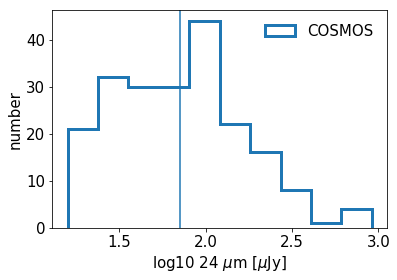

In [93]:
# plt.hist(cosmos_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3, histtype = 'step', lw = 3)
plt.hist(np.log10(cosmos_2019_redshift_HaOIII_mips['spitzer.mips.24']*1e3), histtype = 'step', lw = 3, label = 'COSMOS')
plt.axvline(np.log10(71), c = 'C0')
plt.xlabel(r'log10 24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'best')

# Testing the data

In [21]:
# Final sample in CIGALE format filteres by redshift
# Final sample has 1694 objects

cosmos_2019 = Table.read('/data/FMOS_Laigle/COSMOS_CIGALE_2019.fits', format='fits')

In [22]:
X = np.linspace(0, 6e5, 1000)

band    = ['galex.NUV', 'cfht.megacam.u', 'subaru.suprime.B',\
           'subaru.suprime.V', 'subaru.suprime.r', 'subaru.suprime.i',\
           'subaru.suprime.z', 'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H',\
           'WFCAM_K', 'IRAC1', 'IRAC2', 'IRAC3',\
           'IRAC4', 'spitzer.mips.24',\
           'herschel.pacs.100', 'herschel.pacs.160',\
           'herschel.spire.PSW', 'herschel.spire.PMW', 'herschel.spire.PLW']

band_err = ['galex.NUV_err', 'cfht.megacam.u_err', 'subaru.suprime.B_err',\
            'subaru.suprime.V_err', 'subaru.suprime.r_err', 'subaru.suprime.i_err',\
            'subaru.suprime.z_err', 'subaru.hsc.y_err', 'UKIRT_WFCJ_err', 'cfht.wircam.H_err',\
            'WFCAM_K_err', 'IRAC1_err', 'IRAC2_err', 'IRAC3_err',\
            'IRAC4_err', 'spitzer.mips.24_err',\
            'herschel.pacs.100_err', 'herschel.pacs.160_err',\
            'herschel.spire.PSW_err', 'herschel.spire.PMW_err', 'herschel.spire.PLW_err']

lines     = ['line.H-alpha', 'line.H-beta', 'line.NII-658.4', 'line.OIII-500.7']

lines_err = ['line.H-alpha_err', 'line.H-beta_err', 'line.NII-658.4_err', 'line.OIII-500.7_err']

In [23]:
print('Band: \t\t\t Final Sample \t\t\tSNR>3')
for i in range(len(band)):
    
    x = cosmos_2019[band[i]][cosmos_2019[band[i]] != -9999.99]
    y = cosmos_2019[band[i]][cosmos_2019[band[i]]/cosmos_2019[band_err[i]] > 3]
    
    print('%20s\t\t%i\t\t\t%i'%(band[i], len(x), len(y)))

Band: 			 Final Sample 			SNR>3
           galex.NUV		830			179
      cfht.megacam.u		1691			1543
    subaru.suprime.B		1694			1663
    subaru.suprime.V		1694			1656
    subaru.suprime.r		1692			1673
    subaru.suprime.i		1692			1680
    subaru.suprime.z		1686			1683
        subaru.hsc.y		1686			1621
          UKIRT_WFCJ		1644			1642
       cfht.wircam.H		1644			1644
             WFCAM_K		1644			1640
               IRAC1		1686			1685
               IRAC2		1685			1685
               IRAC3		1681			995
               IRAC4		1686			576
     spitzer.mips.24		1602			1292
   herschel.pacs.100		1602			419
   herschel.pacs.160		1602			168
  herschel.spire.PSW		823			580
  herschel.spire.PMW		823			360
  herschel.spire.PLW		823			152


/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


Objects with Ha 	1514
Objects with Hb 	 368
Objects with [NII] 	974
Objects with [OIII]	 471


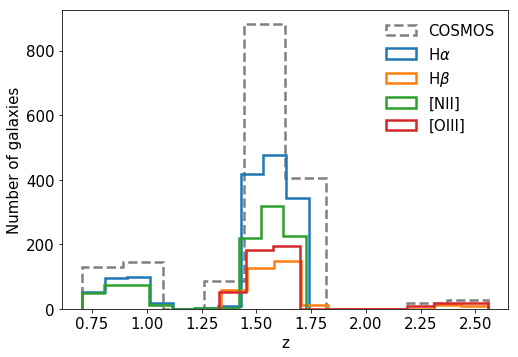

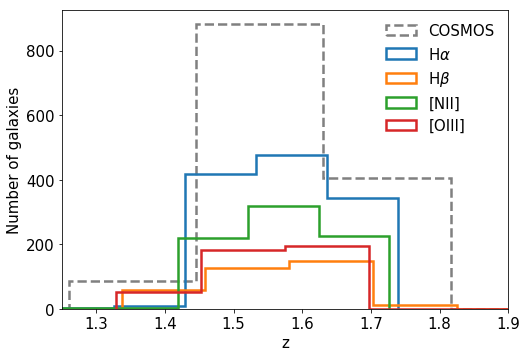

In [25]:
Ha   = cosmos_2019[cosmos_2019['line.H-alpha'] > 0]
Hb   = cosmos_2019[cosmos_2019['line.H-beta'] > 0]
NII  = cosmos_2019[cosmos_2019['line.NII-658.4'] > 0]
OIII = cosmos_2019[cosmos_2019['line.OIII-500.7'] > 0]

print('Objects with Ha \t%i'%len(Ha))
print('Objects with Hb \t %i'%len(Hb))
print('Objects with [NII] \t%i'%len(NII))
print('Objects with [OIII]\t %i'%len(OIII))

plt.figure(figsize = (8,5.5))
plt.hist(cosmos_2019['redshift'], histtype = 'step', lw = 2.5, ls = '--', color = 'grey', label = 'COSMOS')
plt.hist(Ha['redshift'], histtype = 'step', lw = 2.5, label = r'H$\alpha$')
plt.hist(Hb['redshift'], histtype = 'step', lw = 2.5, label = r'H$\beta$')
plt.hist(NII['redshift'], histtype = 'step', lw = 2.5, label = '[NII]')
plt.hist(OIII['redshift'], histtype = 'step', lw = 2.5, label = '[OIII]')
plt.xlabel('z', fontsize = 15)
plt.ylabel('Number of galaxies', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper right');

plt.figure(figsize = (8,5.5))
plt.hist(cosmos_2019['redshift'], histtype = 'step', lw = 2.5, ls = '--', color = 'grey', label = 'COSMOS')
plt.hist(Ha['redshift'], histtype = 'step', lw = 2.5, label = r'H$\alpha$')
plt.hist(Hb['redshift'], histtype = 'step', lw = 2.5, label = r'H$\beta$')
plt.hist(NII['redshift'], histtype = 'step', lw = 2.5, label = '[NII]')
plt.hist(OIII['redshift'], histtype = 'step', lw = 2.5, label = '[OIII]')
plt.xlim(1.25, 1.9)
plt.xlabel('z', fontsize = 15)
plt.ylabel('Number of galaxies', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper right');

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encount

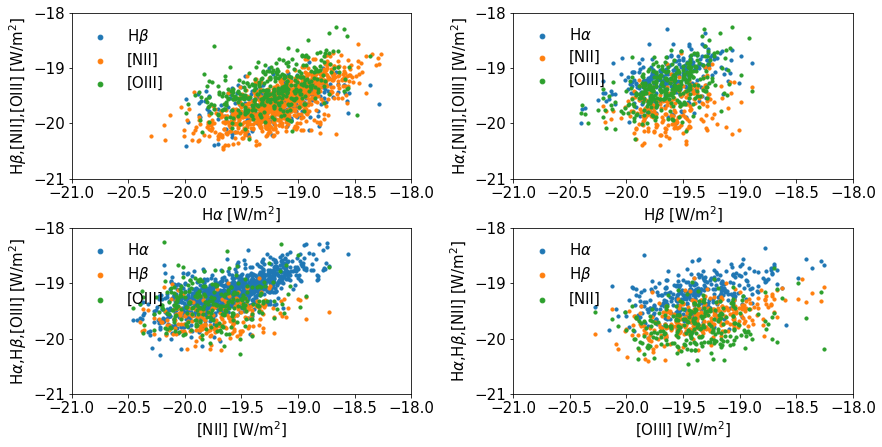

In [26]:
fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize=(14,7), nrows=2, ncols=2)
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

axA.scatter(np.log10(cosmos_2019['line.H-alpha']), np.log10(cosmos_2019['line.H-beta']), s = 10, label = r'H$\beta$')
axA.scatter(np.log10(cosmos_2019['line.H-alpha']), np.log10(cosmos_2019['line.NII-658.4']), s = 10, label = '[NII]')
axA.scatter(np.log10(cosmos_2019['line.H-alpha']), np.log10(cosmos_2019['line.OIII-500.7']), s = 10, label = '[OIII]')
axA.set_xlim(-21, -18)
axA.set_ylim(-21, -18)
axA.set_xlabel(r'H$\alpha$ [W/m$^2$]', fontsize = 15)
axA.set_ylabel(r'H$\beta$,[NII],[OIII] [W/m$^2$]', fontsize = 15)
axA.tick_params(axis = 'both', which = 'major', labelsize = 15)
axA.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left')

axB.scatter(np.log10(cosmos_2019['line.H-beta']), np.log10(cosmos_2019['line.H-alpha']), s = 10, label = r'H$\alpha$')
axB.scatter(np.log10(cosmos_2019['line.H-beta']), np.log10(cosmos_2019['line.NII-658.4']), s = 10, label = '[NII]')
axB.scatter(np.log10(cosmos_2019['line.H-beta']), np.log10(cosmos_2019['line.OIII-500.7']), s = 10, label = '[OIII]')
axB.set_xlim(-21, -18)
axB.set_ylim(-21, -18)
axB.set_xlabel(r'H$\beta$ [W/m$^2$]', fontsize = 15)
axB.set_ylabel(r'H$\alpha$,[NII],[OIII] [W/m$^2$]', fontsize = 15)
axB.tick_params(axis = 'both', which = 'major', labelsize = 15)
axB.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left')

axC.scatter(np.log10(cosmos_2019['line.NII-658.4']), np.log10(cosmos_2019['line.H-alpha']), s = 10, label = r'H$\alpha$')
axC.scatter(np.log10(cosmos_2019['line.NII-658.4']), np.log10(cosmos_2019['line.H-beta']), s = 10, label = r'H$\beta$')
axC.scatter(np.log10(cosmos_2019['line.NII-658.4']), np.log10(cosmos_2019['line.OIII-500.7']), s = 10, label = '[OIII]')
axC.set_xlim(-21, -18)
axC.set_ylim(-21, -18)
axC.set_xlabel('[NII] [W/m$^2$]', fontsize = 15)
axC.set_ylabel(r'H$\alpha$,H$\beta$,[OIII] [W/m$^2$]', fontsize = 15)
axC.tick_params(axis = 'both', which = 'major', labelsize = 15)
axC.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left')

axD.scatter(np.log10(cosmos_2019['line.OIII-500.7']), np.log10(cosmos_2019['line.H-alpha']), s = 10, label = r'H$\alpha$')
axD.scatter(np.log10(cosmos_2019['line.OIII-500.7']), np.log10(cosmos_2019['line.H-beta']), s = 10, label = r'H$\beta$')
axD.scatter(np.log10(cosmos_2019['line.OIII-500.7']), np.log10(cosmos_2019['line.NII-658.4']), s = 10, label = '[NII]')
axD.set_xlim(-21, -18)
axD.set_ylim(-21, -18)
axD.set_xlabel('[OIII] [W/m$^2$]', fontsize = 15)
axD.set_ylabel(r'H$\alpha$,H$\beta$,[NII] [W/m$^2$]', fontsize = 15)
axD.tick_params(axis = 'both', which = 'major', labelsize = 15)
axD.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left')

In [27]:
# ------------------------------------------------------------------------------    
# [NII]

# Kauffmann+03
def kaufmann03(log_NIIHa):
    return(0.61 / (log_NIIHa - 0.05) + 1.3)
# log([OIII]/Hb) = 0.61 / (log([NII]/Ha) - 0.05) + 1.3

# Kewley+01
def kewley01(log_NIIHa):
    return(0.61 / (log_NIIHa - 0.47) + 1.19)
# log([OIII]/Hb) = 0.61 / (log([NII]/Ha) - 0.47) + 1.19    (Kewley+01 line)

# Kewley+13
def kewley13(log_NIIHa, z):
    return(0.61 / (log_NIIHa - 0.02 - 0.1833*z) + 1.2 + 0.03*z)
# 0.61/(log([N II]/Hα) − 0.02 − 0.1833 ∗ z) +1.2 + 0.03 ∗ z     (Kewley+13 line)

log_NIIHa_kauf = np.linspace(-5, 0.0, 100)
log_NIIHa_kewl = np.linspace(-5, 0.49, 100)

/home/jvilla/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Data useful for the BPT-diagram 169


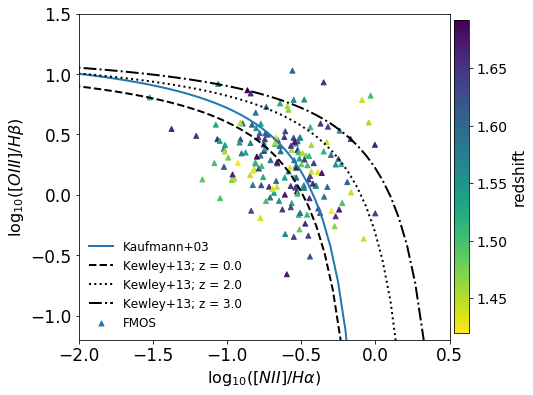

In [28]:
cosmos_2019_1 = cosmos_2019[(cosmos_2019['line.NII-658.4']>0)&\
                            (cosmos_2019['line.H-alpha']>0)&\
                            (cosmos_2019['line.OIII-500.7']>0)&\
                            (cosmos_2019['line.H-beta']>0)]

plt.figure(figsize=(7,6))
plt.scatter(np.log10(cosmos_2019_1['line.NII-658.4']/cosmos_2019_1['line.H-alpha']),\
            np.log10(cosmos_2019_1['line.OIII-500.7']/cosmos_2019_1['line.H-beta']),\
            s = 25, c = cosmos_2019_1['redshift'], cmap = plt.cm.viridis_r, marker = '^', label = 'FMOS')
ce = plt.colorbar(fraction = 0.04, pad = 0.01)
ce.set_label(label = 'redshift', size = 15)
ce.ax.tick_params(labelsize = 14)
plt.plot(log_NIIHa_kauf, kaufmann03(log_NIIHa_kauf), c = 'k', ls = '-', lw = 2, color = 'C0', label = 'Kaufmann+03')
# plt.plot(log_NIIHa_kewl, kewley01(log_NIIHa_kewl), c = 'k', ls = '--', lw = 2)
plt.plot(log_NIIHa_kewl[:90], kewley13(log_NIIHa_kewl, z = 0)[:90], c = 'k', ls = '--', lw = 2, label = 'Kewley+13; z = 0.0')
plt.plot(log_NIIHa_kewl[:98], kewley13(log_NIIHa_kewl, z = 2)[:98], c = 'k', ls = ':', lw = 2, label = 'Kewley+13; z = 2.0')
plt.plot(log_NIIHa_kewl, kewley13(log_NIIHa_kewl, z = 3), c = 'k', ls = '-.', lw = 2, label = 'Kewley+13; z = 3.0')
# plt.plot(log_NIIHa_kewl, kewley13(log_NIIHa_kewl, z = 6), c = 'k', ls = '-', lw = 2, label = 'Kewley+13; z = 6.0')
plt.xlim(-2.0, 0.5)
plt.ylim(-1.2, 1.5)
plt.xlabel(r'$\log_{10}$($[NII]/H\alpha$)', fontsize = 16)
plt.ylabel(r'$\log_{10}$($[OIII]/H\beta$)', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])

plt.legend(frameon = False, prop = {'size': 12}, loc = 'lower left',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

print('Data useful for the BPT-diagram %i'%len(cosmos_2019_1))

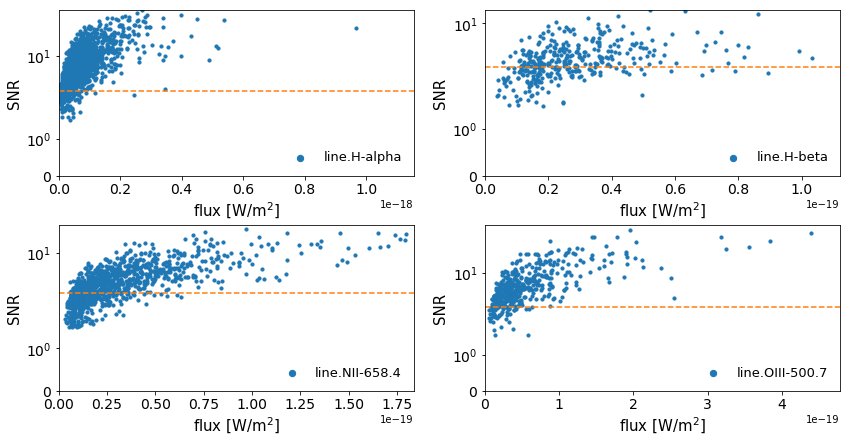

In [29]:
# To check if SNR is ok

fig, axs = plt.subplots(2, 2, figsize=(14, 7), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

axs = axs.ravel()

for i in range(len(lines)):
    
    axs[i].scatter(cosmos_2019[lines[i]], cosmos_2019[lines[i]]/cosmos_2019[lines_err[i]], s = 10)
    axs[i].set_xlabel(r'flux [W/m$^2$]', fontsize = 15)
    axs[i].set_ylabel(r'SNR', fontsize = 15)
    axs[i].axhline(y=3, ls ='--', c = 'C1')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.percentile(cosmos_2019[lines[i]], 99.91))
    axs[i].set_ylim(0, np.percentile(cosmos_2019[lines[i]]/cosmos_2019[lines_err[i]], 99.99))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 13}, markerscale = 2 , loc = 'lower right')

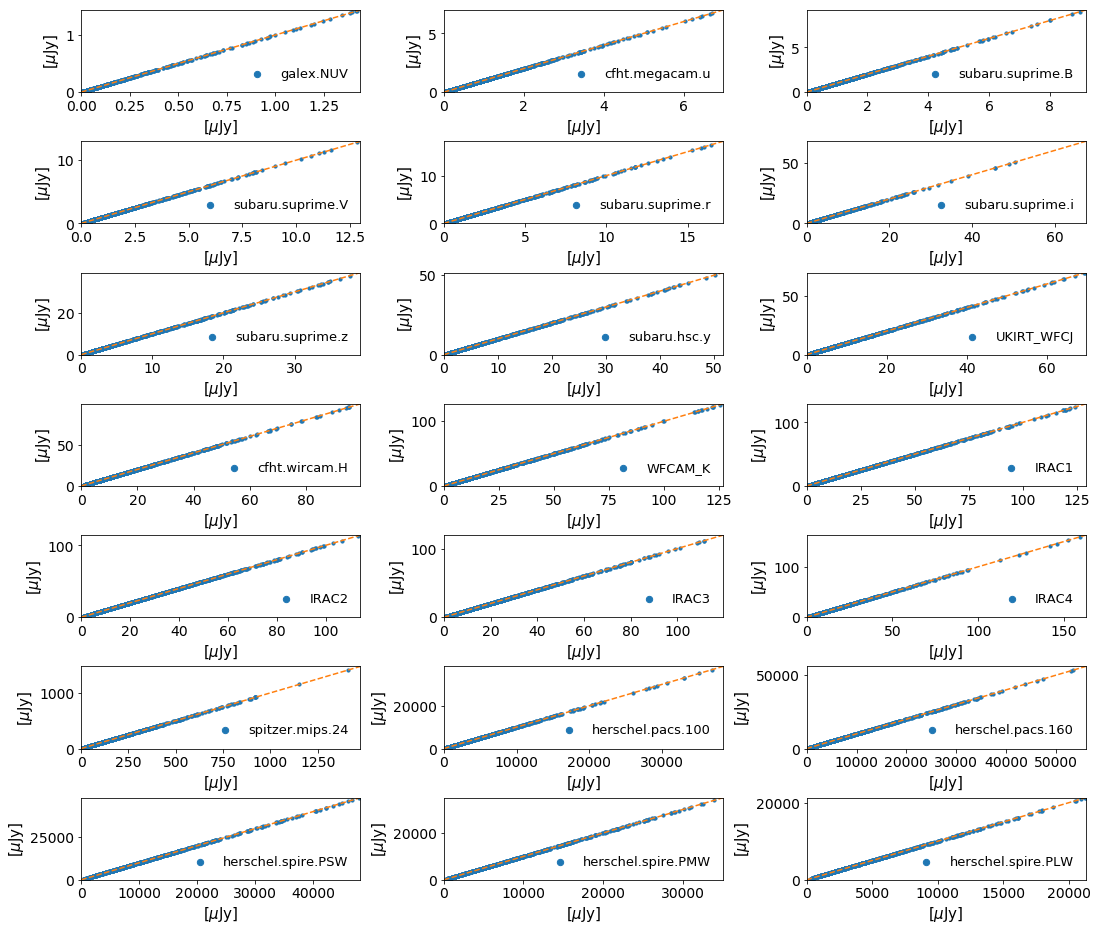

In [30]:
# To check if range is ok

fig, axs = plt.subplots(7, 3, figsize=(18, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace = 0.3)

axs = axs.ravel()

for i in range(len(band)):

    axs[i].scatter(cosmos_2019[band[i]]*1e3, cosmos_2019[band[i]]*1e3, s = 10)
    axs[i].set_xlabel(r'[$\mu$Jy]', fontsize = 15)
    axs[i].set_ylabel(r'[$\mu$Jy]', fontsize = 15)
    axs[i].plot(X, X, ls ='--', c = 'C1')
    axs[i].set_xlim(0, np.percentile(cosmos_2019[band[i]]*1e3, 99.5))
    axs[i].set_ylim(0, np.percentile(cosmos_2019[band[i]]*1e3, 99.5))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 13}, markerscale = 2 , loc = 'lower right')

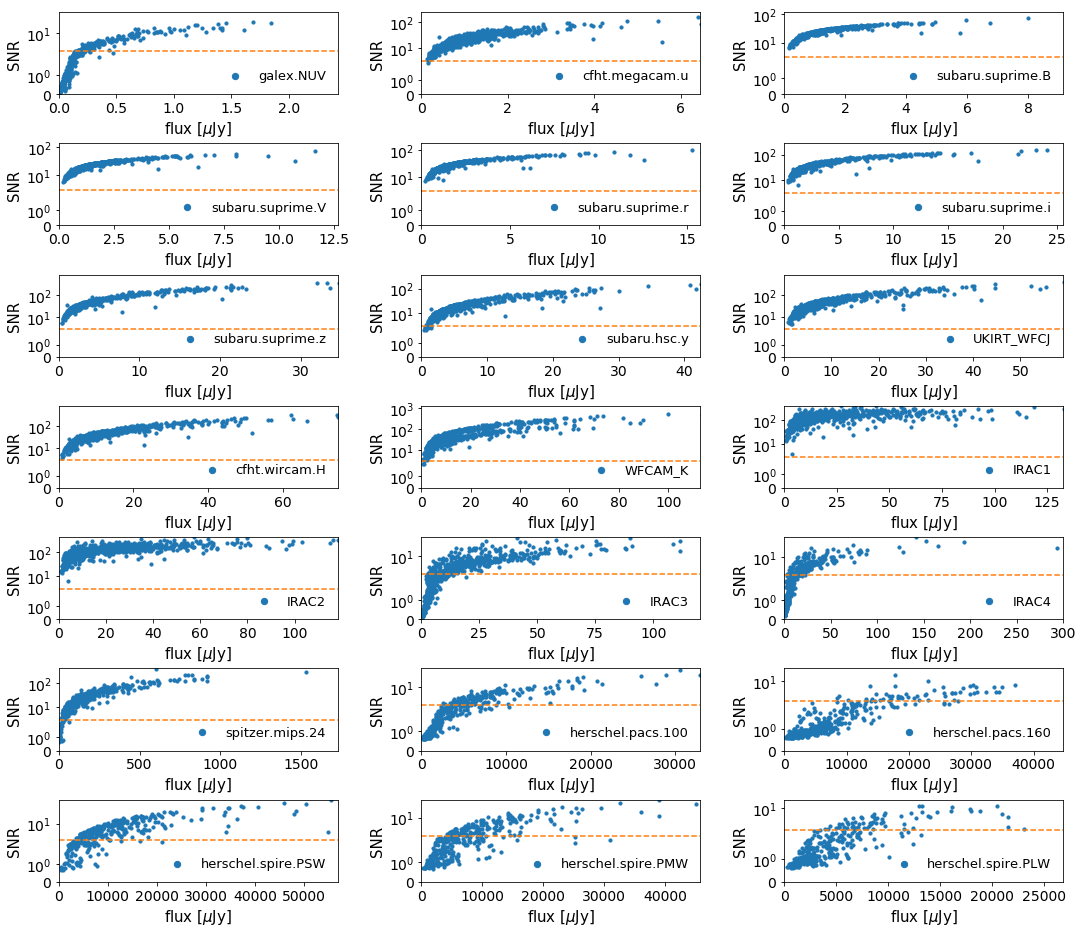

In [31]:
# To check if SNR is ok

fig, axs = plt.subplots(7, 3, figsize=(18, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace = 0.3)

axs = axs.ravel()

for i in range(len(band)):
    
    cosmos_2019 = cosmos_2019[(cosmos_2019[band[i]] > 0) & (cosmos_2019[band_err[i]] > 0)]

    axs[i].scatter(cosmos_2019[band[i]]*1e3, cosmos_2019[band[i]]/cosmos_2019[band_err[i]], s = 10)
    axs[i].set_xlabel(r'flux [$\mu$Jy]', fontsize = 15)
    axs[i].set_ylabel(r'SNR', fontsize = 15)
    axs[i].axhline(y=3, ls ='--', c = 'C1')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.percentile(cosmos_2019[band[i]]*1e3, 99.5))
    axs[i].set_ylim(0, np.percentile(cosmos_2019[band[i]]/cosmos_2019[band_err[i]], 99.98))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 13}, markerscale = 2 , loc = 'lower right')

# Subsample with H$\alpha$, H$\beta$, [NII], and [OIII] emission lines

In [33]:
# If I would like to compare how the data looks for the 41 objects selection

cosmos_2019 = cosmos_2019_1

# I will save a subsample with all this lines so I can fit them with CIGALE
# In this fashion I can do things faster and control the sample 
# Also, I will be able to compare what CIGALE retrieves for the BPT diagram

# cosmos_2019.write('/data/FMOS_Laigle/COSMOS_CIGALE_BPTsubsample_2019.fits', format='fits')

In [34]:
print('Band: \t\t\t Final Sample \t\t\tSNR>3')
for i in range(len(band)):
    
    x = cosmos_2019[band[i]][cosmos_2019[band[i]] != -9999.99]
    y = cosmos_2019[band[i]][cosmos_2019[band[i]]/cosmos_2019[band_err[i]] > 3]
    
    print('%20s\t\t%i\t\t\t%i'%(band[i], len(x), len(y)))

Band: 			 Final Sample 			SNR>3
           galex.NUV		101			23
      cfht.megacam.u		169			166
    subaru.suprime.B		169			167
    subaru.suprime.V		169			167
    subaru.suprime.r		169			167
    subaru.suprime.i		169			167
    subaru.suprime.z		167			167
        subaru.hsc.y		167			167
          UKIRT_WFCJ		163			163
       cfht.wircam.H		163			163
             WFCAM_K		163			163
               IRAC1		167			167
               IRAC2		167			167
               IRAC3		167			82
               IRAC4		167			51
     spitzer.mips.24		160			131
   herschel.pacs.100		160			36
   herschel.pacs.160		160			11
  herschel.spire.PSW		72			46
  herschel.spire.PMW		72			34
  herschel.spire.PLW		72			11


/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


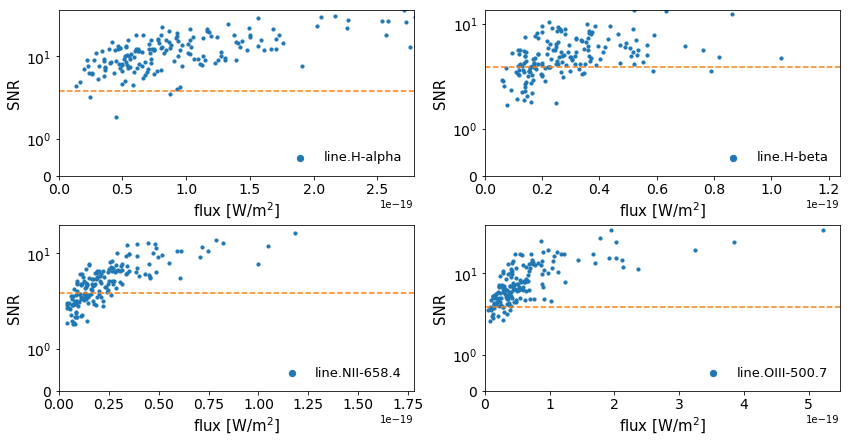

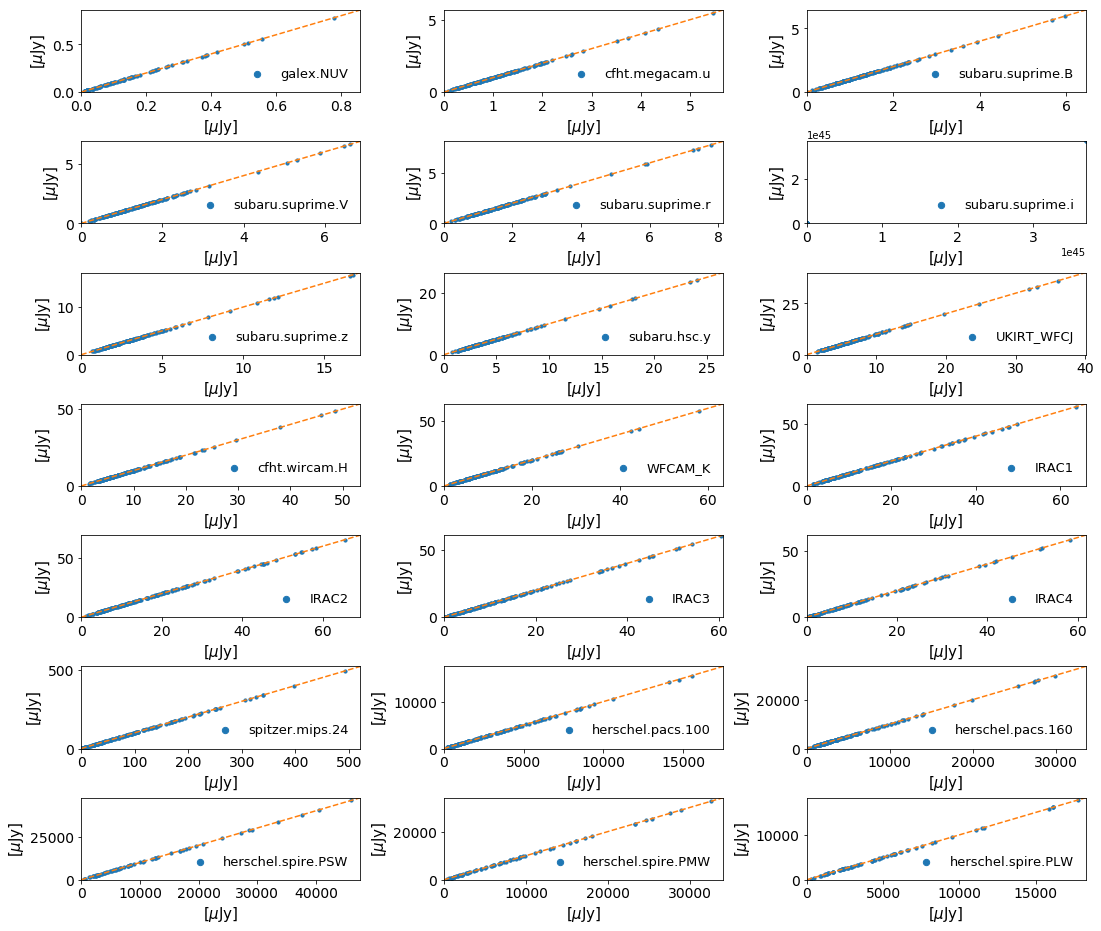

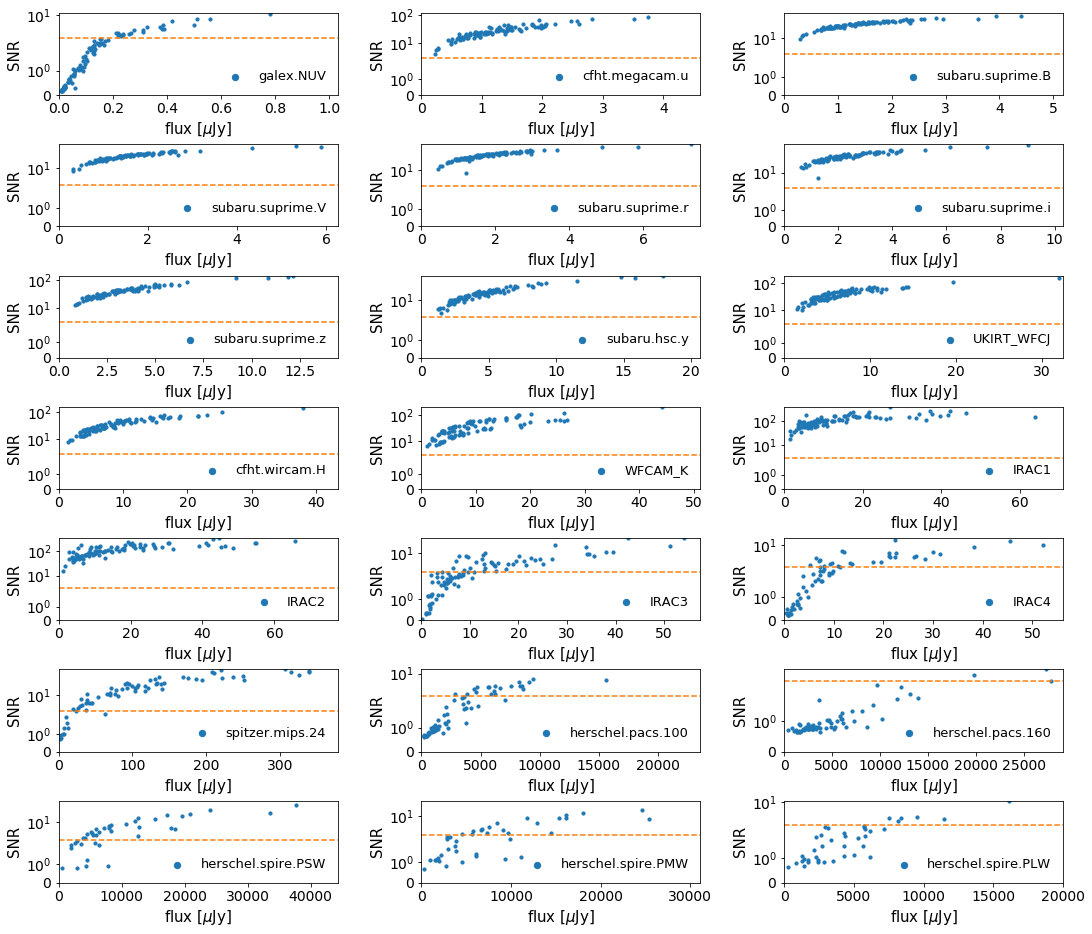

In [35]:
# To check if SNR is ok

fig, axs = plt.subplots(2, 2, figsize=(14, 7), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

axs = axs.ravel()

for i in range(len(lines)):
    
    axs[i].scatter(cosmos_2019[lines[i]], cosmos_2019[lines[i]]/cosmos_2019[lines_err[i]], s = 10)
    axs[i].set_xlabel(r'flux [W/m$^2$]', fontsize = 15)
    axs[i].set_ylabel(r'SNR', fontsize = 15)
    axs[i].axhline(y=3, ls ='--', c = 'C1')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.percentile(cosmos_2019[lines[i]], 99.91))
    axs[i].set_ylim(0, np.percentile(cosmos_2019[lines[i]]/cosmos_2019[lines_err[i]], 99.99))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 13}, markerscale = 2 , loc = 'lower right')

# To check if range is ok

fig, axs = plt.subplots(7, 3, figsize=(18, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace = 0.3)

axs = axs.ravel()

for i in range(len(band)):

    axs[i].scatter(cosmos_2019[band[i]]*1e3, cosmos_2019[band[i]]*1e3, s = 10)
    axs[i].set_xlabel(r'[$\mu$Jy]', fontsize = 15)
    axs[i].set_ylabel(r'[$\mu$Jy]', fontsize = 15)
    axs[i].plot(X, X, ls ='--', c = 'C1')
    axs[i].set_xlim(0, np.percentile(cosmos_2019[band[i]]*1e3, 99.5))
    axs[i].set_ylim(0, np.percentile(cosmos_2019[band[i]]*1e3, 99.5))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 13}, markerscale = 2 , loc = 'lower right')
    
    # To check if SNR is ok

fig, axs = plt.subplots(7, 3, figsize=(18, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace = 0.3)

axs = axs.ravel()

for i in range(len(band)):
    
    cosmos_2019 = cosmos_2019[(cosmos_2019[band[i]] > 0) & (cosmos_2019[band_err[i]] > 0)]

    axs[i].scatter(cosmos_2019[band[i]]*1e3, cosmos_2019[band[i]]/cosmos_2019[band_err[i]], s = 10)
    axs[i].set_xlabel(r'flux [$\mu$Jy]', fontsize = 15)
    axs[i].set_ylabel(r'SNR', fontsize = 15)
    axs[i].axhline(y=3, ls ='--', c = 'C1')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.percentile(cosmos_2019[band[i]]*1e3, 99.5))
    axs[i].set_ylim(0, np.percentile(cosmos_2019[band[i]]/cosmos_2019[band_err[i]], 99.98))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 13}, markerscale = 2 , loc = 'lower right')